Importamos las librerías:

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import unicodedata
from scipy.stats import chi2_contingency
pd.options.mode.copy_on_write=True

# 2023

## Limpieza de datos

- Primero cargamos el dataset de acccidentalidad de Madrid del año 2023:

In [2]:
df_2023 = pd.read_csv(
    "../src/data/2023_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)

Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [3]:
df_2023.shape

(48830, 19)

- Aquí observamos que tiene 19 columnas igual que 2025 y 2024, y tiene 48830 filas

Observamos si tenemos duplicados:

In [4]:
df_duplicados = df_2023[df_2023.duplicated(keep = False)]
df_duplicados

num_expediente       fecha      hora  \
1        2023S000001  01/01/2023   1:15:00   
2        2023S000001  01/01/2023   1:15:00   
47       2023S000024  01/01/2023  10:05:00   
48       2023S000024  01/01/2023  10:05:00   
100      2023S000054  02/01/2023   1:50:00   
...              ...         ...       ...   
48739    2023S040226  31/12/2023   7:45:00   
48793    2023S040256  31/12/2023  18:00:00   
48794    2023S040256  31/12/2023  18:00:00   
48795    2023S040256  31/12/2023  18:00:00   
48796    2023S040256  31/12/2023  18:00:00   

                             localizacion numero  cod_distrito  \
1                  AVDA. ALFONSO XIII, 33     33           5.0   
2                  AVDA. ALFONSO XIII, 33     33           5.0   
47             AVDA. EMPERATRIZ ISABEL, 4      4          11.0   
48             AVDA. EMPERATRIZ ISABEL, 4      4          11.0   
100                      CALL. SAHARA, 58     58          17.0   
...                                   ...    ...           ...   
48739  CALL. RAFAEL FERNANDEZ HIJICOS, 53     53          13.0   
48793                  CALLE MISTERIOS 22     22          15.0   
48794                  CALLE MISTERIOS 22     22          15.0   
48795                  CALLE MISTERIOS 22     22          15.0   
48796                  CALLE MISTERIOS 22     22          15.0   

                 distrito                tipo_accidente estado_meteorológico  \
1               CHAMARTÍN                       Alcance            Despejado   
2               CHAMARTÍN                       Alcance            Despejado   
47            CARABANCHEL             Colisión múltiple              Nublado   
48            CARABANCHEL             Colisión múltiple              Nublado   
100            VILLAVERDE  Choque contra obstáculo fijo                  NaN   
...                   ...                           ...                  ...   
48739  PUENTE DE VALLECAS                          Otro                  NaN   
48793       CIUDAD LINEAL                          Otro            Despejado   
48794       CIUDAD LINEAL                          Otro            Despejado   
48795       CIUDAD LINEAL                          Otro            Despejado   
48796       CIUDAD LINEAL                          Otro            Despejado   

      tipo_vehiculo tipo_persona       rango_edad         sexo  cod_lesividad  \
1      Todo terreno     Pasajero  De 21 a 24 años       Hombre           14.0   
2      Todo terreno     Pasajero  De 21 a 24 años       Hombre           14.0   
47          Turismo    Conductor      Desconocido  Desconocido            NaN   
48          Turismo    Conductor      Desconocido  Desconocido            NaN   
100         Turismo    Conductor      Desconocido  Desconocido            NaN   
...             ...          ...              ...          ...            ...   
48739       Turismo    Conductor      Desconocido  Desconocido            NaN   
48793       Turismo    Conductor      Desconocido  Desconocido            NaN   
48794       Turismo    Conductor      Desconocido  Desconocido            NaN   
48795       Turismo    Conductor      Desconocido  Desconocido            NaN   
48796       Turismo    Conductor      Desconocido  Desconocido            NaN   

                      lesividad  coordenada_x_utm  coordenada_y_utm  \
1      Sin asistencia sanitaria          443397.0         4478129.0   
2      Sin asistencia sanitaria          443397.0         4478129.0   
47                          NaN          439137.0         4472181.0   
48                          NaN          439137.0         4472181.0   
100                         NaN          441293.0         4467162.0   
...                         ...               ...               ...   
48739                       NaN          446096.0         4471171.0   
48793                       NaN          445632.0         4476800.0   
48794                       NaN          445632.0         4476800.0   
48795           

In [5]:
df_duplicados.shape

(3581, 19)

In [6]:
df_2023 = df_2023.drop_duplicates(keep = "first")
df_2023.shape

(46801, 19)

Ahora para saber si cada columna esta en el tipo correcto y dectar problemas como por ejemplo numeros como textos, fechas mal cargadas, booleanos como strings,etc.

In [7]:
df_2023.head()

num_expediente       fecha     hora            localizacion numero  \
0    2023S000001  01/01/2023  1:15:00  AVDA. ALFONSO XIII, 33     33   
1    2023S000001  01/01/2023  1:15:00  AVDA. ALFONSO XIII, 33     33   
3    2023S000001  01/01/2023  1:15:00  AVDA. ALFONSO XIII, 33     33   
4    2023S000001  01/01/2023  1:15:00  AVDA. ALFONSO XIII, 33     33   
5    2023S000001  01/01/2023  1:15:00  AVDA. ALFONSO XIII, 33     33   

   cod_distrito   distrito tipo_accidente estado_meteorológico tipo_vehiculo  \
0           5.0  CHAMARTÍN        Alcance            Despejado  Todo terreno   
1           5.0  CHAMARTÍN        Alcance            Despejado  Todo terreno   
3           5.0  CHAMARTÍN        Alcance            Despejado  Todo terreno   
4           5.0  CHAMARTÍN        Alcance            Despejado  Todo terreno   
5           5.0  CHAMARTÍN        Alcance            Despejado       Turismo   

  tipo_persona       rango_edad    sexo  cod_lesividad  \
0    Conductor  De 55 a 59 años   Mujer           14.0   
1     Pasajero  De 21 a 24 años  Hombre           14.0   
3     Pasajero  De 21 a 24 años   Mujer            7.0   
4     Pasajero  De 55 a 59 años  Hombre            7.0   
5    Conductor  De 45 a 49 años   Mujer           14.0   

                                           lesividad  coordenada_x_utm  \
0                           Sin asistencia sanitaria          443397.0   
1                           Sin asistencia sanitaria          443397.0   
3  Asistencia sanitaria sólo en el lugar del acci...          443397.0   
4  Asistencia sanitaria sólo en el lugar del acci...          443397.0   
5                           Sin asistencia sanitaria          443397.0   

   coordenada_y_utm positiva_alcohol  positiva_droga  
0         4478129.0                N             NaN  
1         4478129.0                N             NaN  
3         4478129.0                N             NaN  
4         4478129.0                N             NaN  
5         4478129.0                S             NaN

In [8]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46801 entries, 0 to 48829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        46801 non-null  object 
 1   fecha                 46801 non-null  object 
 2   hora                  46801 non-null  object 
 3   localizacion          46801 non-null  object 
 4   numero                46798 non-null  object 
 5   cod_distrito          46798 non-null  float64
 6   distrito              46798 non-null  object 
 7   tipo_accidente        46801 non-null  object 
 8   estado_meteorológico  41430 non-null  object 
 9   tipo_vehiculo         46426 non-null  object 
 10  tipo_persona          46801 non-null  object 
 11  rango_edad            46801 non-null  object 
 12  sexo                  46801 non-null  object 
 13  cod_lesividad         25564 non-null  float64
 14  lesividad             25564 non-null  object 
 15  coordenada_x_utm      46

Aquí procedemos a hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demás.

In [9]:
df_2023_copy = df_2023.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.

In [10]:
# Número de nulos 
nulos = df_2023.isna().sum() 

# Porcentaje de nulos 
nulos_pct = (nulos / len(df_2023) * 100).round(2) 

# Cardinalidad 
card = df_2023.nunique() 

# Porcentaje de cardinalidad 
card_pct = (card / len(df_2023) * 100).round(2) 

# Tipo de dato 
tipos = df_2023.dtypes 

#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 

# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

nulos  % nulos  cardinalidad  % cardinalidad     tipo
num_expediente            0     0.00         20672           44.17   object
localizacion              0     0.00         15924           34.02   object
coordenada_y_utm          9     0.02         11071           23.66  float64
coordenada_x_utm          9     0.02         10170           21.73  float64
numero                    3     0.01          1717            3.67   object
hora                      0     0.00          1250            2.67   object
fecha                     0     0.00           365            0.78   object
tipo_vehiculo           375     0.80            34            0.07   object
cod_distrito              3     0.01            21            0.04  float64
distrito                  3     0.01            21            0.04   object
rango_edad                0     0.00            18            0.04   object
tipo_accidente            0     0.00            13            0.03   object
cod_lesividad         21237    45.38             9            0.02  float64
lesividad             21237    45.38             9            0.02   object
estado_meteorológico   5371    11.48             6            0.01   object
tipo_persona              0     0.00             3            0.01   object
sexo                      0     0.00             3            0.01   object
positiva_alcohol        182     0.39             2            0.00   object
positiva_droga        46587    99.54             1            0.00  float64

In [11]:
df_2023["fecha"] = pd.to_datetime(df_2023["fecha"], errors="coerce", dayfirst=True) 
df_2023["hora"] = pd.to_datetime(df_2023["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_2023["fecha_hora"] = df_2023.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_2023[col] = df_2023[col].astype("string").str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

- Ahora vamos a tratar los nulos 

In [12]:
# 1. ESTADO METEOROLÓGICO
df_2023['estado_meteorológico'] = df_2023['estado_meteorológico'].fillna('Se desconoce')

# 2. TIPO VEHÍCULO 
mask_no_aplica = df_2023['tipo_persona'].str.lower().isin(['peatón']) 

# Peatón y testigo → No aplica 
df_2023.loc[ mask_no_aplica & df_2023['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica'

# El resto de nulos → No consta 
df_2023['tipo_vehiculo'] = df_2023['tipo_vehiculo'].fillna('No consta') 

# 3. LESIVIDAD (ORDINAL) 
df_2023['cod_lesividad'] = df_2023['cod_lesividad'].fillna(14) 
df_2023['lesividad'] = df_2023['lesividad'].fillna('Sin asistencia sanitaria')

# 4. ALCOHOL
df_2023['positiva_alcohol'] = df_2023['positiva_alcohol'].fillna('No consta') 

# 5. NUMERO 
df_2023['numero'] = df_2023['numero'].fillna('No aplica')

# 6. TIPO DE ACCIDENTE
if 'tipo_accidente' in df_2023.columns:
    df_2023['tipo_accidente'] = (
        df_2023['tipo_accidente'].fillna('No consta')
    )


# Eliminamos la columna de drogas por la gran cantidad de nulos
df_2023 = df_2023.drop(columns = ["positiva_droga"])

- Vemos si los nulos de 'cod_distrito' y 'distrito' los podemos rellenar:

In [13]:
# Si me devuelve True es que los nulos de 'cod_distrito' son los mismos que los de 'distrito'
df_2023[df_2023["cod_distrito"].isna()].equals(df_2023[df_2023["distrito"].isna()])

True

In [14]:
df_2023[df_2023["distrito"].isna()]

num_expediente      fecha      hora  \
10110    2023s009762 2023-03-16  22:40:00   
38239    2023s032768 2023-10-21  00:40:00   
38240    2023s032768 2023-10-21  00:40:00   

                                            localizacion     numero  \
10110  gta. isidro gonzalez velazquez / call. francis...  No aplica   
38239                  villaverde a vallecas (farola 11)  No aplica   
38240                  villaverde a vallecas (farola 11)  No aplica   

       cod_distrito distrito                tipo_accidente  \
10110           NaN      NaN  Choque contra obstáculo fijo   
38239           NaN      NaN                       Alcance   
38240           NaN      NaN                       Alcance   

      estado_meteorológico  tipo_vehiculo tipo_persona       rango_edad  \
10110            Despejado        Turismo    Conductor  De 45 a 49 años   
38239            Despejado        Turismo    Conductor  De 25 a 29 años   
38240            Despejado  VMU eléctrico    Conductor  De 18 a 20 años   

         sexo  cod_lesividad                    lesividad  coordenada_x_utm  \
10110   Mujer           14.0     Sin asistencia sanitaria          446979.0   
38239  Hombre           14.0     Sin asistencia sanitaria          441291.0   
38240  Hombre            3.0  Ingreso superior a 24 horas          441291.0   

       coordenada_y_utm positiva_alcohol          fecha_hora  
10110         4481398.0                N 2023-03-16 22:40:00  
38239         4467125.0                N 2023-10-21 00:40:00  
38240         4467125.0                N 2023-10-21 00:40:00

Primero comprobamos que no haya más expedientes con esos números que sí tengan los valores de distrito y su código:

In [15]:
df_2023[df_2023["num_expediente"] == "2023s009762"]

num_expediente      fecha      hora  \
10110    2023s009762 2023-03-16  22:40:00   

                                            localizacion     numero  \
10110  gta. isidro gonzalez velazquez / call. francis...  No aplica   

       cod_distrito distrito                tipo_accidente  \
10110           NaN      NaN  Choque contra obstáculo fijo   

      estado_meteorológico tipo_vehiculo tipo_persona       rango_edad   sexo  \
10110            Despejado       Turismo    Conductor  De 45 a 49 años  Mujer   

       cod_lesividad                 lesividad  coordenada_x_utm  \
10110           14.0  Sin asistencia sanitaria          446979.0   

       coordenada_y_utm positiva_alcohol          fecha_hora  
10110         4481398.0                N 2023-03-16 22:40:00

In [16]:
df_2023[df_2023["num_expediente"] == "2023s032768"]

num_expediente      fecha      hora                       localizacion  \
38239    2023s032768 2023-10-21  00:40:00  villaverde a vallecas (farola 11)   
38240    2023s032768 2023-10-21  00:40:00  villaverde a vallecas (farola 11)   

          numero  cod_distrito distrito tipo_accidente estado_meteorológico  \
38239  No aplica           NaN      NaN        Alcance            Despejado   
38240  No aplica           NaN      NaN        Alcance            Despejado   

       tipo_vehiculo tipo_persona       rango_edad    sexo  cod_lesividad  \
38239        Turismo    Conductor  De 25 a 29 años  Hombre           14.0   
38240  VMU eléctrico    Conductor  De 18 a 20 años  Hombre            3.0   

                         lesividad  coordenada_x_utm  coordenada_y_utm  \
38239     Sin asistencia sanitaria          441291.0         4467125.0   
38240  Ingreso superior a 24 horas          441291.0         4467125.0   

      positiva_alcohol          fecha_hora  
38239                N 2023-10-21 00:40:00  
38240                N 2023-10-21 00:40:00

Como no los hay la siguiente opción es buscar en Internet.
En el caso de la Glorieta, está en Hortaleza y buscando por coordenadas vemos que la Carretera de Villaverde a Vallecas (farola 11) está en Villaverde, así que buscamos cuáles son sus códigos de distrito:

In [17]:
df_2023[df_2023["distrito"] == "hortaleza".upper()].head(1)

num_expediente      fecha      hora  \
59    2023s000029 2023-01-01  10:20:00   

                                       localizacion numero  cod_distrito  \
59  plaza. alcalde moreno torres / avda pi y margal     1a          16.0   

     distrito                tipo_accidente estado_meteorológico  \
59  HORTALEZA  Choque contra obstáculo fijo              Nublado   

   tipo_vehiculo tipo_persona   rango_edad         sexo  cod_lesividad  \
59       Turismo    Conductor  Desconocido  Desconocido           14.0   

                   lesividad  coordenada_x_utm  coordenada_y_utm  \
59  Sin asistencia sanitaria          444340.0         4482134.0   

   positiva_alcohol          fecha_hora  
59                N 2023-01-01 10:20:00

In [18]:
df_2023[df_2023["distrito"] == "villaverde".upper()].head(1)

num_expediente      fecha      hora                    localizacion numero  \
18    2023s000007 2023-01-01  05:35:00  call. arroyo de la bulera, 11a    11a   

    cod_distrito    distrito tipo_accidente estado_meteorológico  \
18          17.0  VILLAVERDE           Otro            Despejado   

   tipo_vehiculo tipo_persona       rango_edad    sexo  cod_lesividad  \
18       Turismo    Conductor  De 21 a 24 años  Hombre           14.0   

                   lesividad  coordenada_x_utm  coordenada_y_utm  \
18  Sin asistencia sanitaria          442149.0         4465639.0   

   positiva_alcohol          fecha_hora  
18                N 2023-01-01 05:35:00

In [19]:
# 7. DISTRITO Y SU CÓDIGO
mascara1 = df_2023["distrito"].isna() & (df_2023["num_expediente"] == "2023s009762")
mascara2 = df_2023["cod_distrito"].isna() & (df_2023["num_expediente"] == "2023s009762")
mascara3 = df_2023["distrito"].isna() & (df_2023["num_expediente"] == "2023s032768")
mascara4 = df_2023["cod_distrito"].isna() & (df_2023["num_expediente"] == "2023s032768")
df_2023.loc[mascara1, "distrito"] = "hortaleza".upper()
df_2023.loc[mascara2, "cod_distrito"] = float(16)
df_2023.loc[mascara3, "distrito"] = "villaverde".upper()
df_2023.loc[mascara4, "cod_distrito"] = float(17)

- Ahora tratamos los nulos de las coordenadas X e Y:

In [20]:
df_nulos_geo = df_2023[
    df_2023[['coordenada_x_utm', 'coordenada_y_utm']].isna().any(axis=1)
]
df_nulos_geo

num_expediente      fecha      hora  \
24789    2023s024414 2023-07-03  08:50:00   
24790    2023s024414 2023-07-03  08:50:00   
35760    2023s031205 2023-10-04  14:27:00   
46140    2023s037825 2023-12-14  09:45:00   
46711    2023s038704 2023-12-17  02:45:00   
46712    2023s038704 2023-12-17  02:45:00   
46727    2023s038728 2023-12-17  07:35:00   
46912    2023s038882 2023-12-18  13:40:00   
46913    2023s038882 2023-12-18  13:40:00   

                                  localizacion   numero  cod_distrito  \
24789                   aerop. terminal t-4, 0        0          21.0   
24790                   aerop. terminal t-4, 0        0          21.0   
35760                   call. cea bermudez, 57       57           7.0   
46140                        call. atocha, 112      112           1.0   
46711                  pasarela de la princesa  +00500i           2.0   
46712                  pasarela de la princesa  +00500i           2.0   
46727  avda. palomeras / call. puerto del pico      150          13.0   
46912                      autov. m-30, 07nc40   07nc40           4.0   
46913                      autov. m-30, 07nc40   07nc40           4.0   

                 distrito                tipo_accidente estado_meteorológico  \
24789             BARAJAS              Colisión lateral            Despejado   
24790             BARAJAS              Colisión lateral            Despejado   
35760            CHAMBERÍ                         Caída            Despejado   
46140              CENTRO  Choque contra obstáculo fijo            Despejado   
46711          ARGANZUELA           Atropello a persona            Despejado   
46712          ARGANZUELA           Atropello a persona            Despejado   
46727  PUENTE DE VALLECAS       Colisión fronto-lateral            Despejado   
46912           SALAMANCA                       Alcance            Despejado   
46913           SALAMANCA                       Alcance            Despejado   

             tipo_vehiculo tipo_persona       rango_edad    sexo  \
24789         Todo terreno    Conductor  De 50 a 54 años  Hombre   
24790              Turismo    Conductor  De 35 a 39 años  Hombre   
35760        VMU eléctrico    Conductor  De 50 a 54 años   Mujer   
46140        Camión rígido    Conductor  De 50 a 54 años  Hombre   
46711        VMU eléctrico    Conductor  De 18 a 20 años  Hombre   
46712        VMU eléctrico       Peatón  De 50 a 54 años   Mujer   
46727            No consta    Conductor  De 55 a 59 años  Hombre   
46912  Motocicleta > 125cc    Conductor  De 35 a 39 años  Hombre   
46913         Todo terreno    Conductor  De 35 a 39 años  Hombre   

       cod_lesividad                                          lesividad  \
24789           14.0                           Sin asistencia sanitaria   
24790           14.0                           Sin asistencia sanitaria   
35760            7.0  Asistencia sanitaria sólo en el lugar del acci...   
46140           14.0                           Sin asistencia sanitaria   
46711           14.0                           Sin asistencia sanitaria   
46712            2.0                Ingreso inferior o igual a 24 horas   
46727            7.0  Asistencia sanitaria sólo en el lugar del acci...   
46912            5.0  Asistencia sanitaria ambulatoria con posterior...   
46913           14.0                           Sin asistencia sanitaria   

       coordenada_x_utm  coordenada_y_utm positiva_alcohol          fecha_hora  
24789               NaN               NaN                N 2023-07-03 08:50:00  
24790               NaN               NaN                N 2023-07-03 08:50:00  
35760               NaN               NaN                N 2023-10-04 14:27:00  
46140               NaN               NaN                N 2023-12-14 09:45:00  
46711               NaN               NaN                N 2023-12-17 02:45:00  
46712               NaN               NaN                N 2023-12-17 02:45:00  
46727               NaN 

In [21]:
# 9. COORDENADAS UTM
# Buscamos la longitud y latitud en Google Maps en el caso de las calles,  y pasamos a coordenadas UTM
coords = {
    "2023s031205": (439353.0, 4476728.0),  # Cea Bermúdez, 57
    "2023s037825": (441159.0, 4473437.0)   # Atocha, 112
}

for exp, (x, y) in coords.items():
    df_2023.loc[
        df_2023['num_expediente'] == exp,
        'coordenada_x_utm'
    ] = x

    df_2023.loc[
        df_2023['num_expediente'] == exp,
        'coordenada_y_utm'
    ] = y

# El resto las eliminamos porque es difícil econtrar las coordenadas exactas
expedientes_a_eliminar = {
    "2023s024414",
    "2023s038704",
    "2023s038728",
    "2023s038882"
}
df_2023 = df_2023[
    ~df_2023["num_expediente"].isin(expedientes_a_eliminar)
]

In [22]:
# 9. NUEVA COLUMNA CON CATEGORÍA DE LESIVIDAD SIMPLIFICADA
df_2023["grado_lesividad"] = df_2023["cod_lesividad"].map({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})

In [23]:
# 10. NORMALIZAR VALORES DE ALCOHOL (S/N → Positivo/Negativo)
mapa_alcohol = {
    "S": "Positivo",
    "N": "Negativo",
    "No consta": "No consta",
}
df_2023["positiva_alcohol"] = (
    df_2023["positiva_alcohol"]
    .map(mapa_alcohol)
    .fillna("No consta")   # por si aparece algún valor inesperado
)

In [24]:
# 11. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'grado_lesividad'
                 ] 
for col in cols_category: 
    df_2023[col] = df_2023[col].astype('category')

In [25]:
# 12. NUEVA CATEGORÍA DE FRANJAS HORARIAS

df_2023['franja_horaria'] = pd.cut(
        df_2023['fecha_hora'].dt.hour,
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

Comprobamos que el dataset ya está limpio:

In [26]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46794 entries, 0 to 48829
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        46794 non-null  string        
 1   fecha                 46794 non-null  datetime64[ns]
 2   hora                  46794 non-null  object        
 3   localizacion          46794 non-null  string        
 4   numero                46794 non-null  string        
 5   cod_distrito          46794 non-null  category      
 6   distrito              46794 non-null  category      
 7   tipo_accidente        46794 non-null  category      
 8   estado_meteorológico  46794 non-null  category      
 9   tipo_vehiculo         46794 non-null  category      
 10  tipo_persona          46794 non-null  category      
 11  rango_edad            46794 non-null  category      
 12  sexo                  46794 non-null  category      
 13  cod_lesividad        

Guardamos el dataset limpio a CSV y utilizamos parquet para que se conserven los tipos de datos:

In [27]:
df_2023.to_parquet("../src/data/2023_Accidentalidad_Limpio.parquet")

# Análisis Univariante

### Tendencias centrales

Miro la moda de las variables categóricas para ver qué valores tienen mayor frecuencia absoluta:

In [28]:
cols_categoricas = ["tipo_persona",
                    "distrito",
                    "localizacion",
                    "tipo_accidente",
                    "estado_meteorológico",
                    "rango_edad",
                    "lesividad",
                    "positiva_alcohol",
                    "tipo_vehiculo",
                    "sexo",
                    "franja_horaria",
                    "grado_lesividad"
                    ]

In [29]:
df_2023[cols_categoricas].mode().T

0
tipo_persona                         Conductor
distrito                    PUENTE DE VALLECAS
localizacion               autov. a-2, +00500e
tipo_accidente         Colisión fronto-lateral
estado_meteorológico                 Despejado
rango_edad                     De 45 a 49 años
lesividad             Sin asistencia sanitaria
positiva_alcohol                      Negativo
tipo_vehiculo                          Turismo
sexo                                    Hombre
franja_horaria                           Tarde
grado_lesividad       Sin asistencia sanitaria

### Análisis univariante temporal

In [30]:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first'
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos

In [31]:
def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Gráficos temporales univariantes:
    - Accidentes por mes (barras)
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Curva mensual ampliada (línea con puntos)
    - Curvas diarias por mes (12 gráficas adicionales)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")


def _graficos(df, col_datetime, titulo_extra=""):

    fig = plt.figure(figsize=(16, 18))

    # 1. Accidentes por mes
    ax_mes = plt.subplot2grid((3, 2), (0, 0))
    freq_mes = df['mes'].value_counts().sort_index()
    freq_mes.plot(kind='bar', ax=ax_mes, color="steelblue",
                  title=f'Accidentes por mes ({titulo_extra})')
    ax_mes.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_mes.values):
        ax_mes.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 2. Accidentes por día de la semana
    ax_semana = plt.subplot2grid((3, 2), (0, 1))
    freq_semana = df['dia_semana'].value_counts()
    freq_semana.plot(kind='bar', ax=ax_semana, color="darkcyan",
                     title=f'Accidentes por día de la semana ({titulo_extra})')
    ax_semana.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_semana.values):
        ax_semana.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 3. Accidentes por hora
    ax_hora = plt.subplot2grid((3, 2), (1, 0))
    freq_hora = df['hora'].value_counts().sort_index()
    freq_hora.plot(kind='bar', ax=ax_hora, color="darkorange",
                   title=f'Accidentes por hora ({titulo_extra})')
    ax_hora.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_hora.values):
        ax_hora.text(i, v + 5, str(v), ha="center", fontsize=8)

    # 4. Accidentes por franja horaria
    ax_franja = plt.subplot2grid((3, 2), (1, 1))
    freq_franja = df['franja'].value_counts()
    freq_franja.plot(kind='bar', ax=ax_franja, color="mediumseagreen",
                     title=f'Accidentes por franja horaria ({titulo_extra})')
    ax_franja.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_franja.values):
        ax_franja.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 5. Curva mensual ampliada
    ax_curva = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    frecuencia_mensual = df[col_datetime].dt.month.value_counts().sort_index()

    meses_es = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ]
    meses_plot = [meses_es[i-1] for i in frecuencia_mensual.index]

    ax_curva.plot(
        meses_plot, frecuencia_mensual.values,
        marker="o", linewidth=3, color="steelblue"
    )
    ax_curva.set_title(f"Curva de frecuencia mensual ({titulo_extra})", fontsize=14)
    ax_curva.set_xlabel("Mes")
    ax_curva.set_ylabel("Número de accidentes")
    ax_curva.grid(True)
    for i, v in enumerate(frecuencia_mensual.values):
        ax_curva.text(i, v + 10, str(v), ha="center", fontsize=10)
    ax_curva.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()
    
    # 6. NUEVO: curvas diarias por mes (12 gráficas adicionales)
    
    for mes in range(1, 12 + 1):
        df_mes = df[df[col_datetime].dt.month == mes]
        if df_mes.empty:
            continue

        freq_dia = df_mes[col_datetime].dt.day.value_counts().sort_index()

        plt.figure(figsize=(10, 4))
        plt.plot(freq_dia.index, freq_dia.values, marker="o", linewidth=2, color="firebrick")
        plt.title(f"Curva diaria – {meses_es[mes-1]} ({titulo_extra})")
        plt.xlabel("Día del mes")
        plt.ylabel("Número de accidentes")
        plt.grid(True)

        for i, v in enumerate(freq_dia.values):
            plt.text(freq_dia.index[i], v + 0.5, str(v), ha="center", fontsize=8)

        plt.tight_layout()
        plt.show()

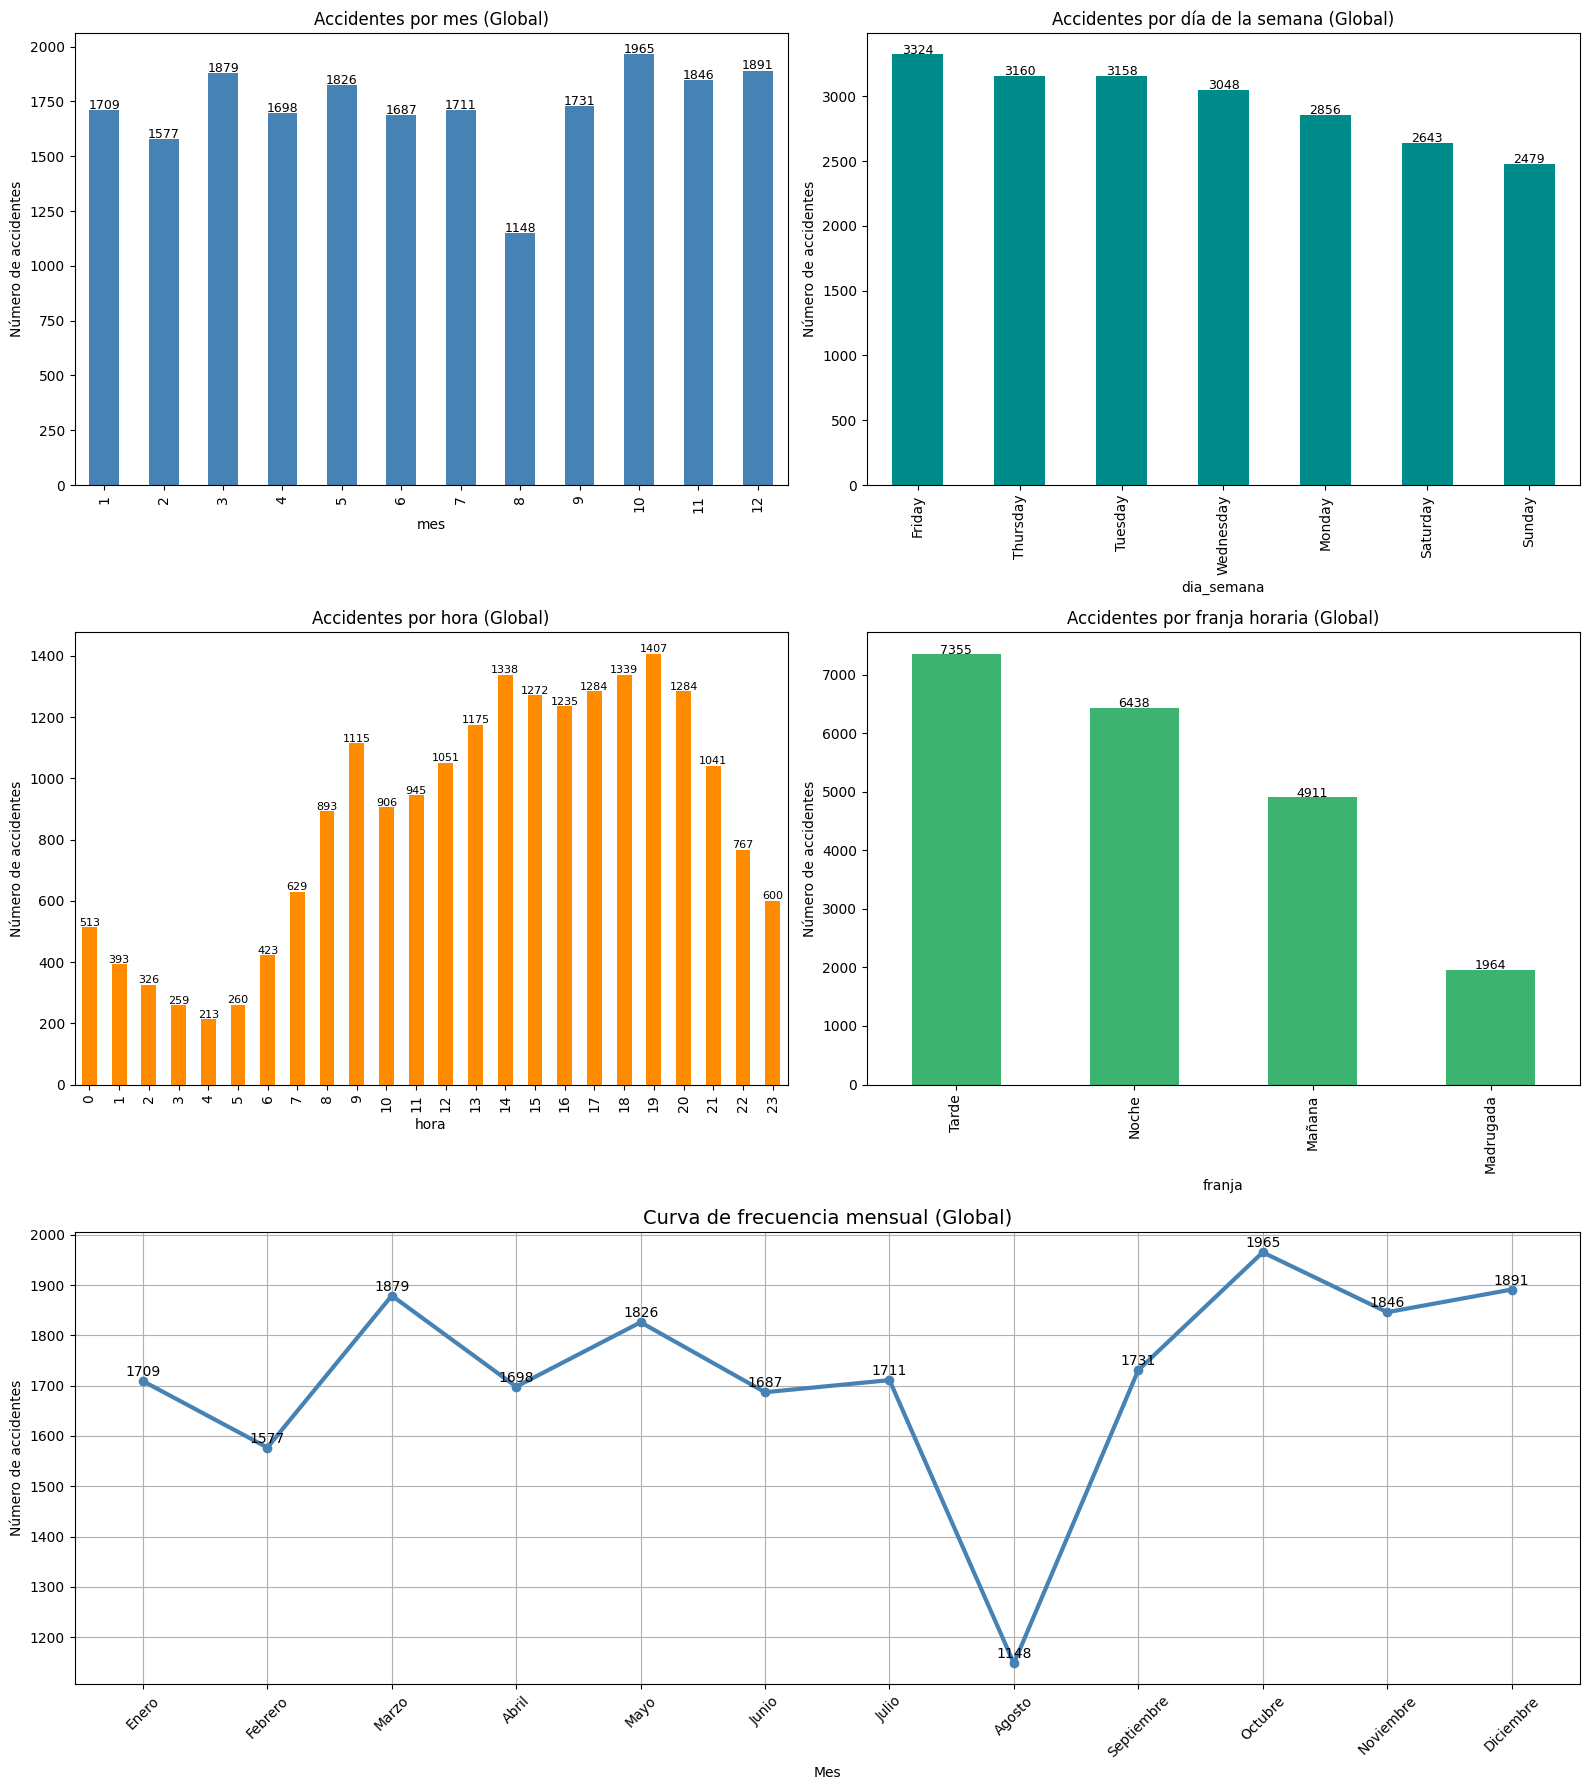

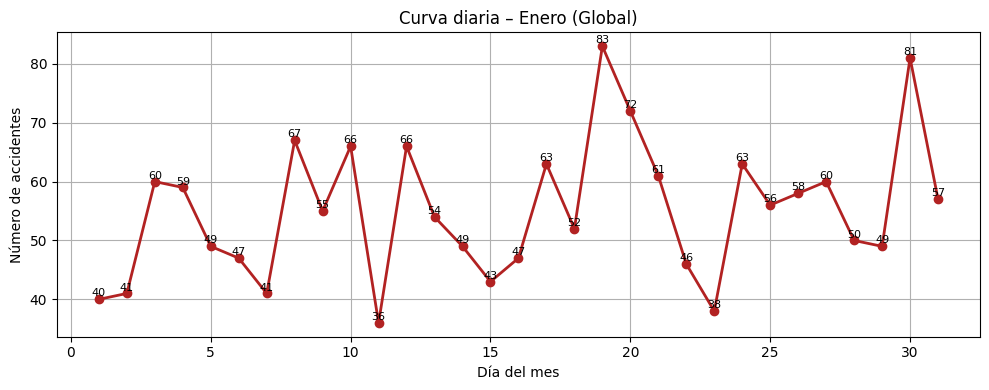

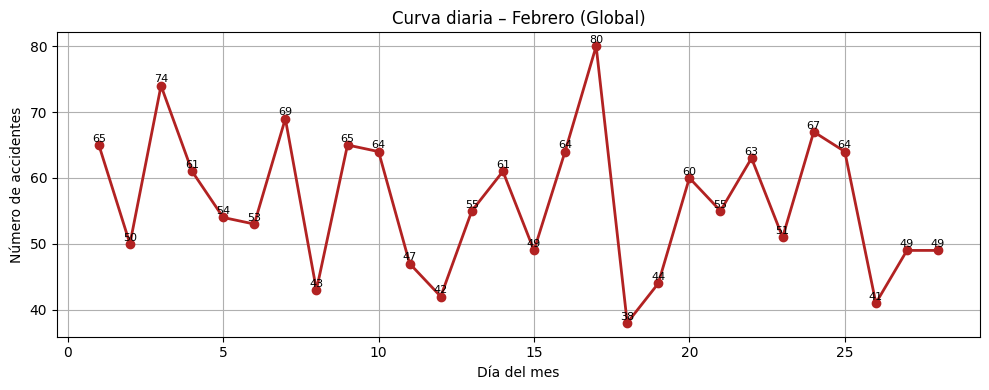

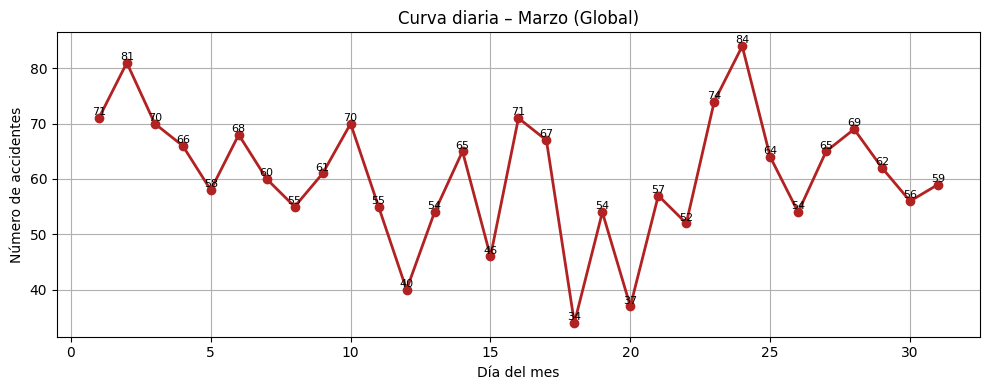

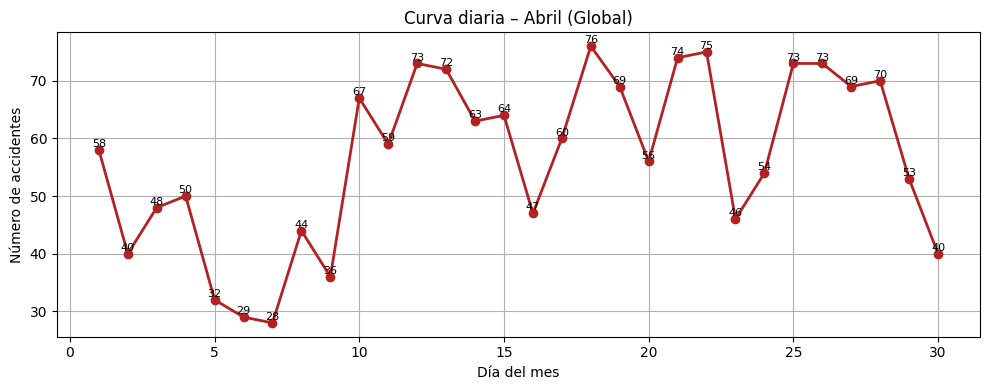

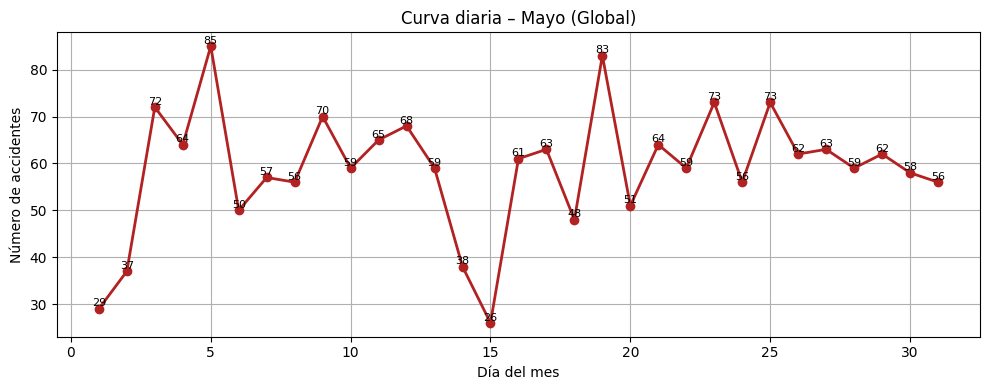

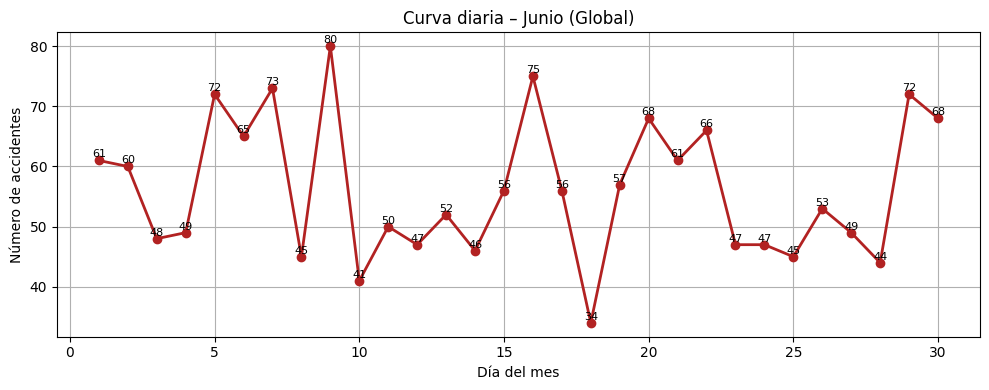

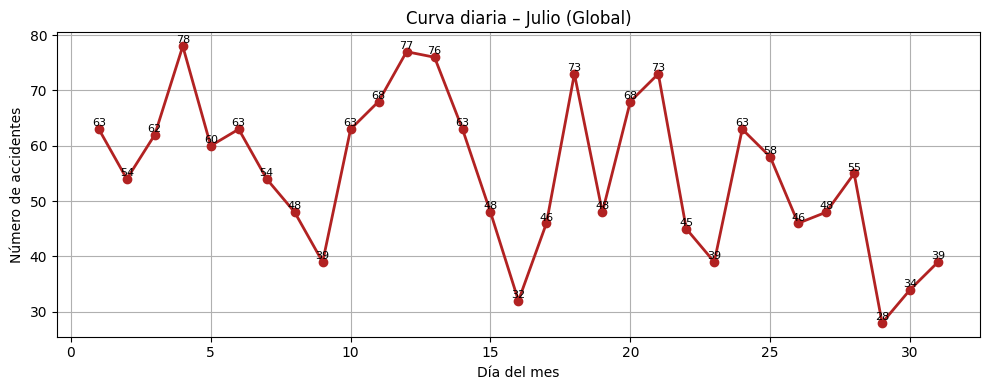

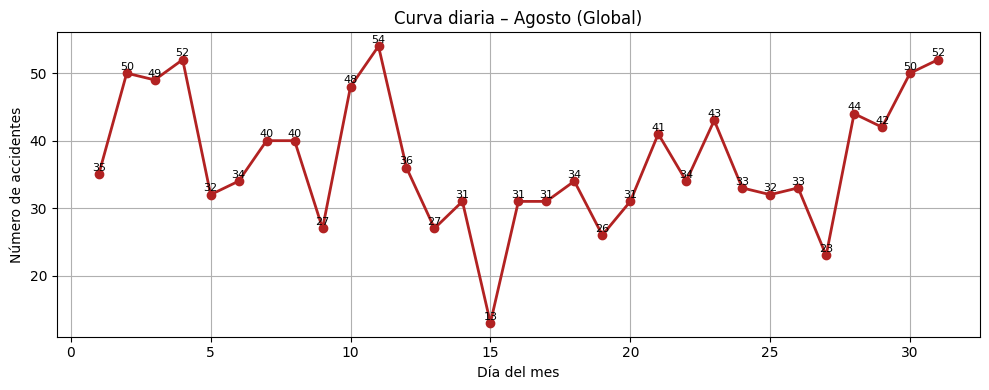

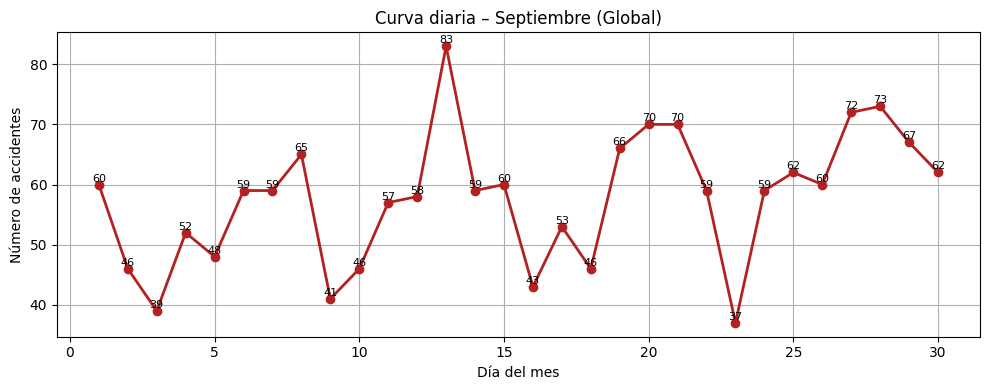

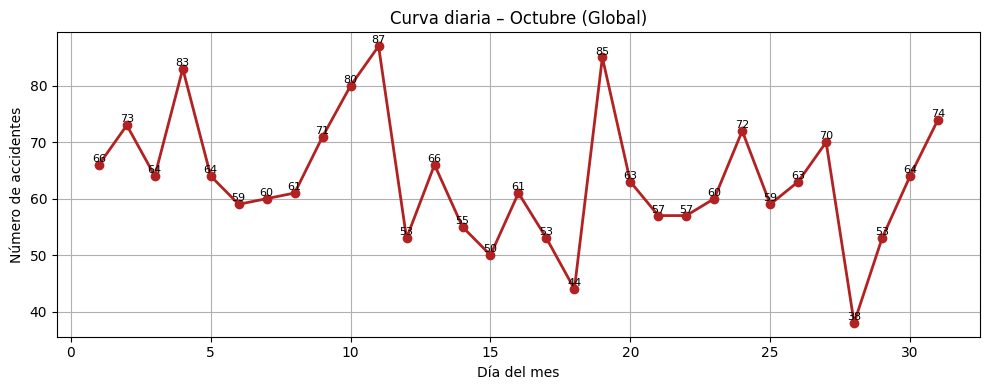

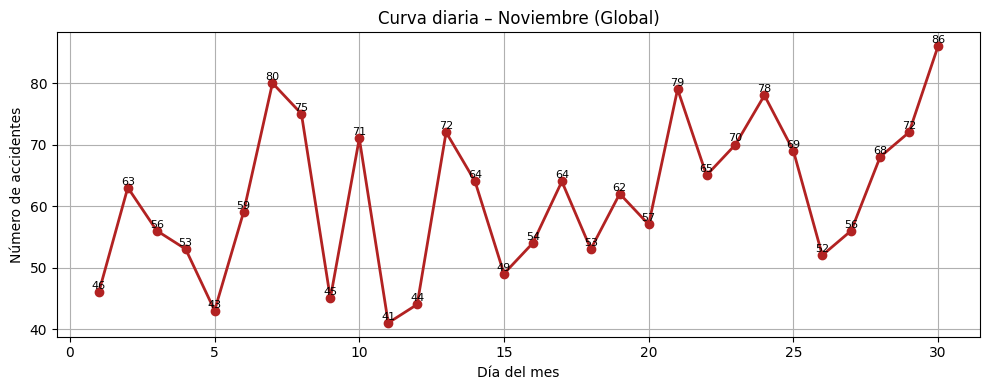

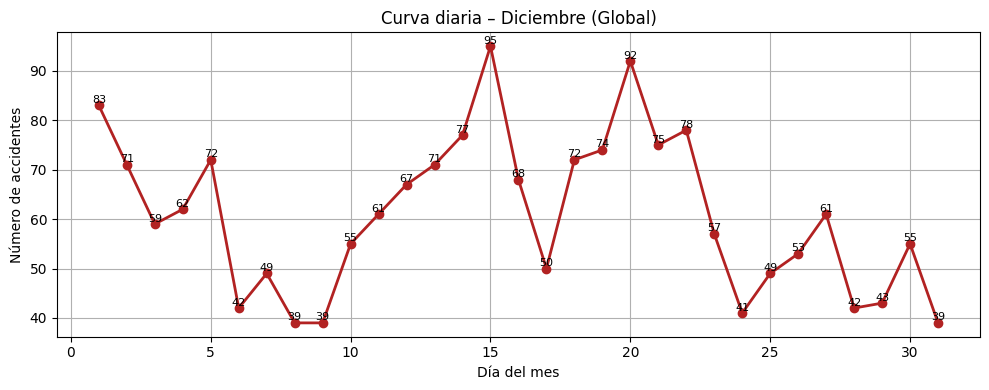

In [32]:
df_unicos = preparar_accidentes_unicos(df_2023)
plot_temporal_univariate(df_unicos)

1. En la primera gráfica se puede observar que los tres meses con más accidentes son Marzo, Octubre y Diciembre. Y hay una clara bajada en Agosto. 
2. En la gráfica de accidente por día de la semana se puede observar que el día con más accidentes son los viernes y con menos los domingos.
3. En la gráfica de accidentes por hora vemos que las franjas con más accidentes son entre las 14:00 y las 15:00 (coindice con la salida del trabajo de mucha gente), y entre las 18:00 y las 19:00.
4. En la gráfica de accidentes por franja horaria, observamos que cuando más accidentes hay es por la tarde.

Vamos con el análisis diario para cada mes:

##### Enero
- Caídas: días 1 (festivo), 11 y 26
- Picos: días 19 y 30
##### Febrero
- Caídas: días 8, 12, 18 y 26 (salvo el día 8, fin de semana)
- Picos: días 3 y 17 (ambos viernes)
##### Marzo
- Caídas: días 19 (Domingo) y 20 (festivo del día 19 trasladado al lunes)
- Picos: días 1 y 24 (viernes)
##### Abril
- Caídas: del 5 al 9 (Semana Santa)
- Picos: varios entre semana 
##### Mayo
- Caídas: días 1, 2 y 15 (todos festivos)
- Picos: días 5 y 19 (ambos viernes)
- Estabilidad a partir del día 26
##### Junio
- Caídas: día 18 (domingo)
- Picos: días 9 y 16 (viernes)
##### Julio
- Caídas: fines de semana
- Picos: días laborales
##### Agosto
- Caídas: día 15 (festivo)
- Picos: días 4 y 11 (ambos viernes)
##### Septiembre
- Caídas: días 3, 9 y 23 (fines de semana)
- Picos: día 13 (anomalía: es miércoles, no festivo)
##### Octubre
- Caídas: días 18 y 28 (domingo)
- Picos: días entre semana que no son viernes
##### Noviembre
- Caídas: días 1, 5, 9 y 11 (fines de semana y los días 1 y 9 festivos)
- Picos: días laborales
##### Diciembre
- Caídas: días festivos
- Picos: días 15 (viernes) y 20

### Análisis univariante Geográfico

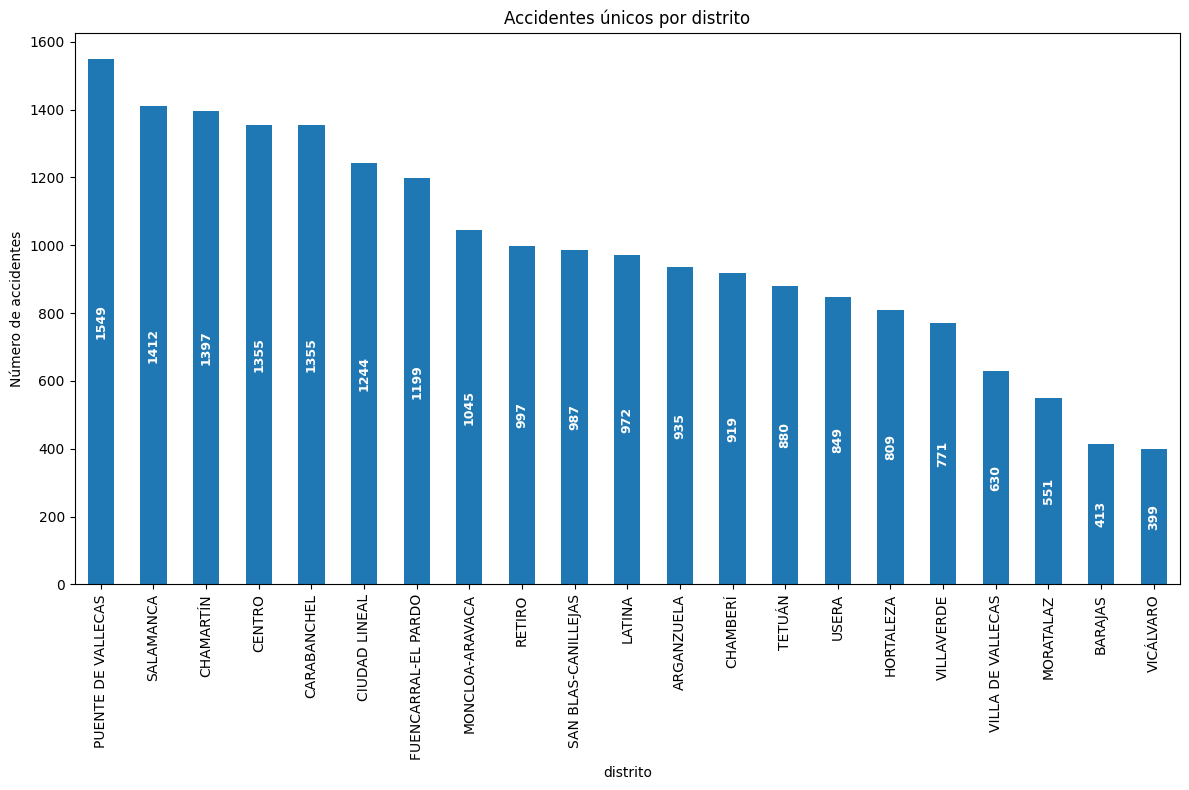

In [33]:
# Calcular accidentes únicos por distrito
accidentes_distrito = (
    df_2023
    .groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Crear gráfico
ax = accidentes_distrito.plot(kind="bar", figsize=(12,8))

plt.title("Accidentes únicos por distrito")
plt.ylabel("Número de accidentes")

# Eje Y con saltos de 200
max_val = accidentes_distrito.max()
plt.yticks(np.arange(0, max_val + 200, 200))

# Añadir el número de accidentes dentro de cada barra, tumbado
for p, value in zip(ax.patches, accidentes_distrito):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value}",
        (x, y),
        ha="center", va="center",
        rotation=90,          #  texto tumbado
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()

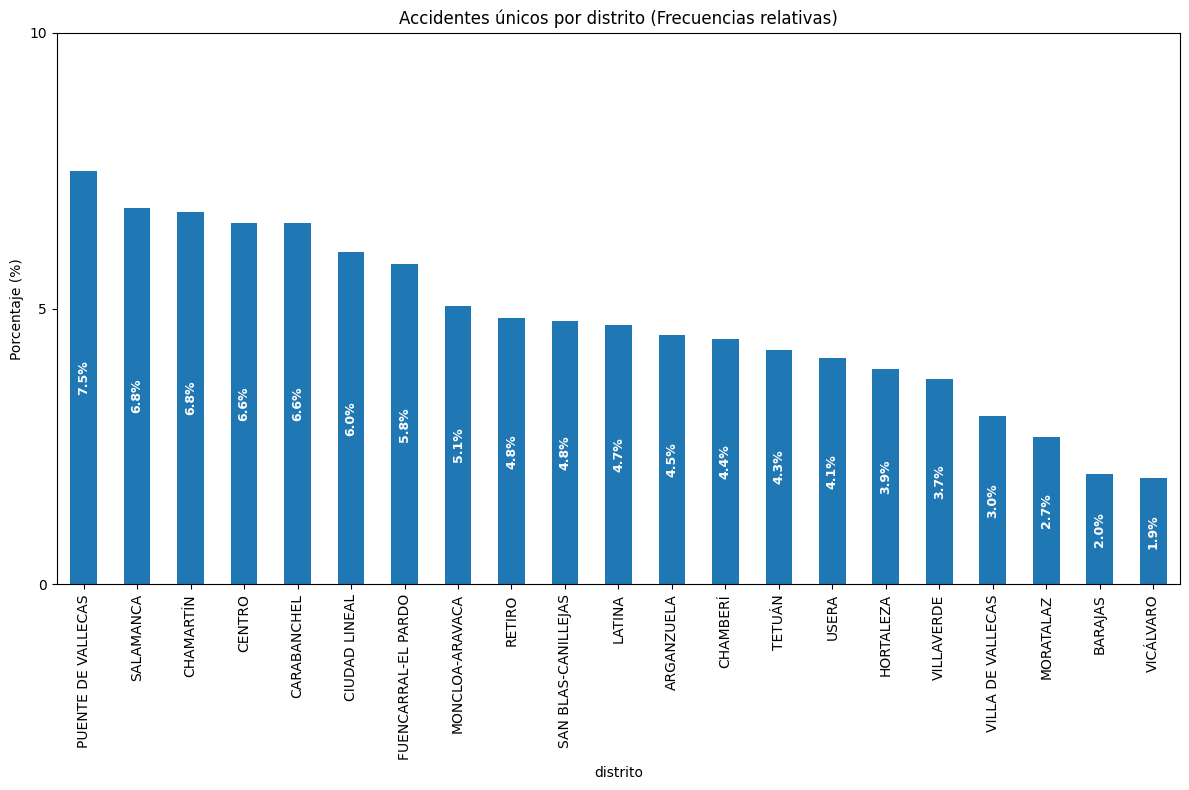

In [34]:
# Calcular accidentes únicos por distrito (absolutos)
accidentes_distrito = (
    df_2023
    .groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Convertir a frecuencias relativas (%)
accidentes_rel = accidentes_distrito / accidentes_distrito.sum() * 100

# Crear gráfico
ax = accidentes_rel.plot(kind="bar", figsize=(12,8))

plt.title("Accidentes únicos por distrito (Frecuencias relativas)")
plt.ylabel("Porcentaje (%)")

# Eje Y con saltos de 5%
max_val = accidentes_rel.max()
plt.yticks(np.arange(0, max_val + 5, 5))

# Añadir el porcentaje dentro de cada barra, tumbado
for p, value in zip(ax.patches, accidentes_rel):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value:.1f}%",      # porcentaje con 1 decimal
        (x, y),
        ha="center", va="center",
        rotation=90,
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()

La mayor concentración de accidentes se encuentra en los distristos más céntricos. Tanto en términos absolutos como relativos, los distritos con más accidentes son Puente de Vallecas, Salamanca y Chamartín, y con menos son Barajas y Vicálvaro.

A continuación vemos los puntos negros:

In [35]:
# 1. Funciones de normalización
def normalize_text(s):
    """Normaliza texto: minúsculas, espacios, sin tildes."""
    if pd.isna(s):
        return None
    s = s.lower().strip()
    s = " ".join(s.split())  # elimina dobles espacios
    s = ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
    return s

def normalize_numero(n):
    """Normaliza número de portal, detecta S/N."""
    if pd.isna(n):
        return None
    n = str(n).lower().strip()
    if n in ['s/n', 'sn', 's-n', '']:
        return None
    return n

# 2. Normalización de columnas clave


df = df_2023.copy()

df['localizacion_norm'] = df['localizacion'].apply(normalize_text)
df['numero_norm'] = df['numero'].apply(normalize_numero)
df['num_expediente'] = df['num_expediente'].astype(str).str.strip()

# eliminar duplicados exactos de num expediente
df = df.drop_duplicates(subset=['num_expediente'])


# 3. Construcción de clave de localización final


df['clave_localizacion'] = (
    df['localizacion_norm'].fillna('') + ' ' +
    df['numero_norm'].fillna('')
).str.strip()

# 4. Detección de puntos negros con distrito

puntos_negros = (
    df.groupby(['localizacion_norm', 'distrito'], observed = False)['num_expediente']
      .nunique()
      .reset_index(name='n_expedientes')
      .sort_values('n_expedientes', ascending=False)
)

# filtrar solo localizaciones con más de un accidente distinto
puntos_negros = puntos_negros[puntos_negros['n_expedientes'] > 1]

# 5. Resultado final
puntos_negros

localizacion_norm            distrito  \
1665                               autov. a-2, +00500e       CIUDAD LINEAL   
3335                              autov. a-42, +00500e               USERA   
3383                              autov. a-42, +00500s         CARABANCHEL   
33935   avda. andalucia / avda. gran via de villaverde          VILLAVERDE   
4988                                    autov. m-23, 0           MORATALAZ   
...                                                ...                 ...   
332514               ronda. toledo / call. santocildes          ARGANZUELA   
332619                               ronda. toledo, 14          ARGANZUELA   
332661                               ronda. toledo, 26          ARGANZUELA   
332685                                ronda. toledo, 3              CENTRO   
333912                  uni. politecnica campus sur, 0  PUENTE DE VALLECAS   

        n_expedientes  
1665               39  
3335               29  
3383               18  
33935              17  
4988               16  
...               ...  
332514              2  
332619              2  
332661              2  
332685              2  
333912              2  

[2615 rows x 3 columns]

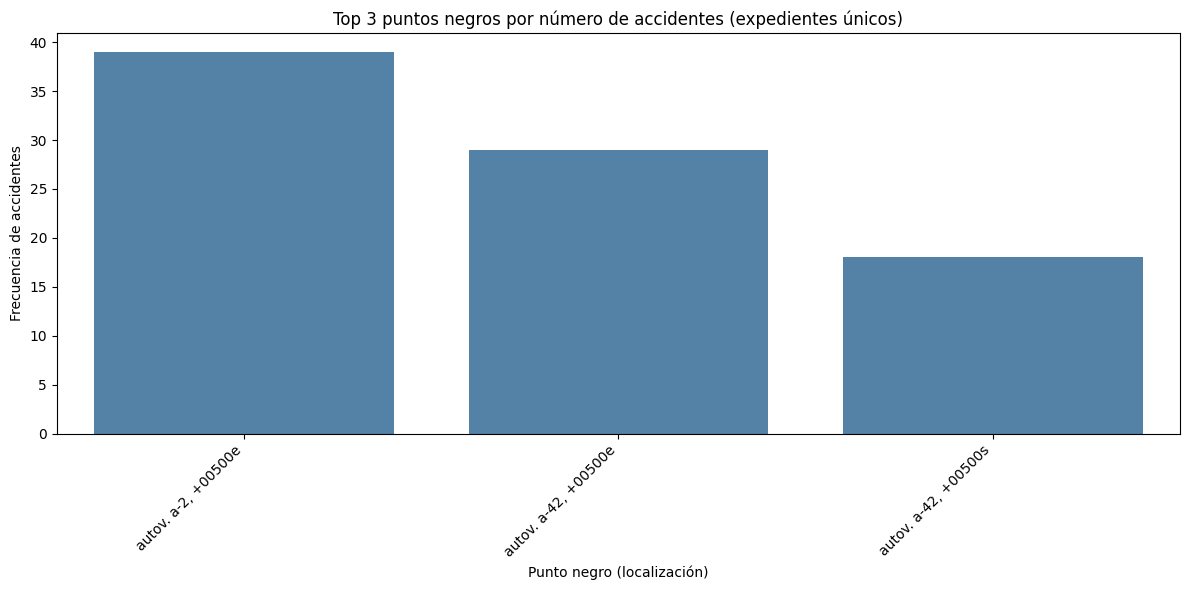

In [36]:
# Seleccionar los 5 puntos negros con más accidentes
top3 = puntos_negros.nlargest(3, 'n_expedientes').copy()

# Resetear índice para evitar problemas de posición
top3 = top3.reset_index(drop=True)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top3,
    x='localizacion_norm',
    y='n_expedientes',
    color='steelblue'
)

plt.title('Top 3 puntos negros por número de accidentes (expedientes únicos)')
plt.xlabel('Punto negro (localización)')
plt.ylabel('Frecuencia de accidentes')

# Rotar etiquetas del eje X para que se lean bien
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Mismos puntos negros que en 2024.

### Análisis univariante por tipo de accidente

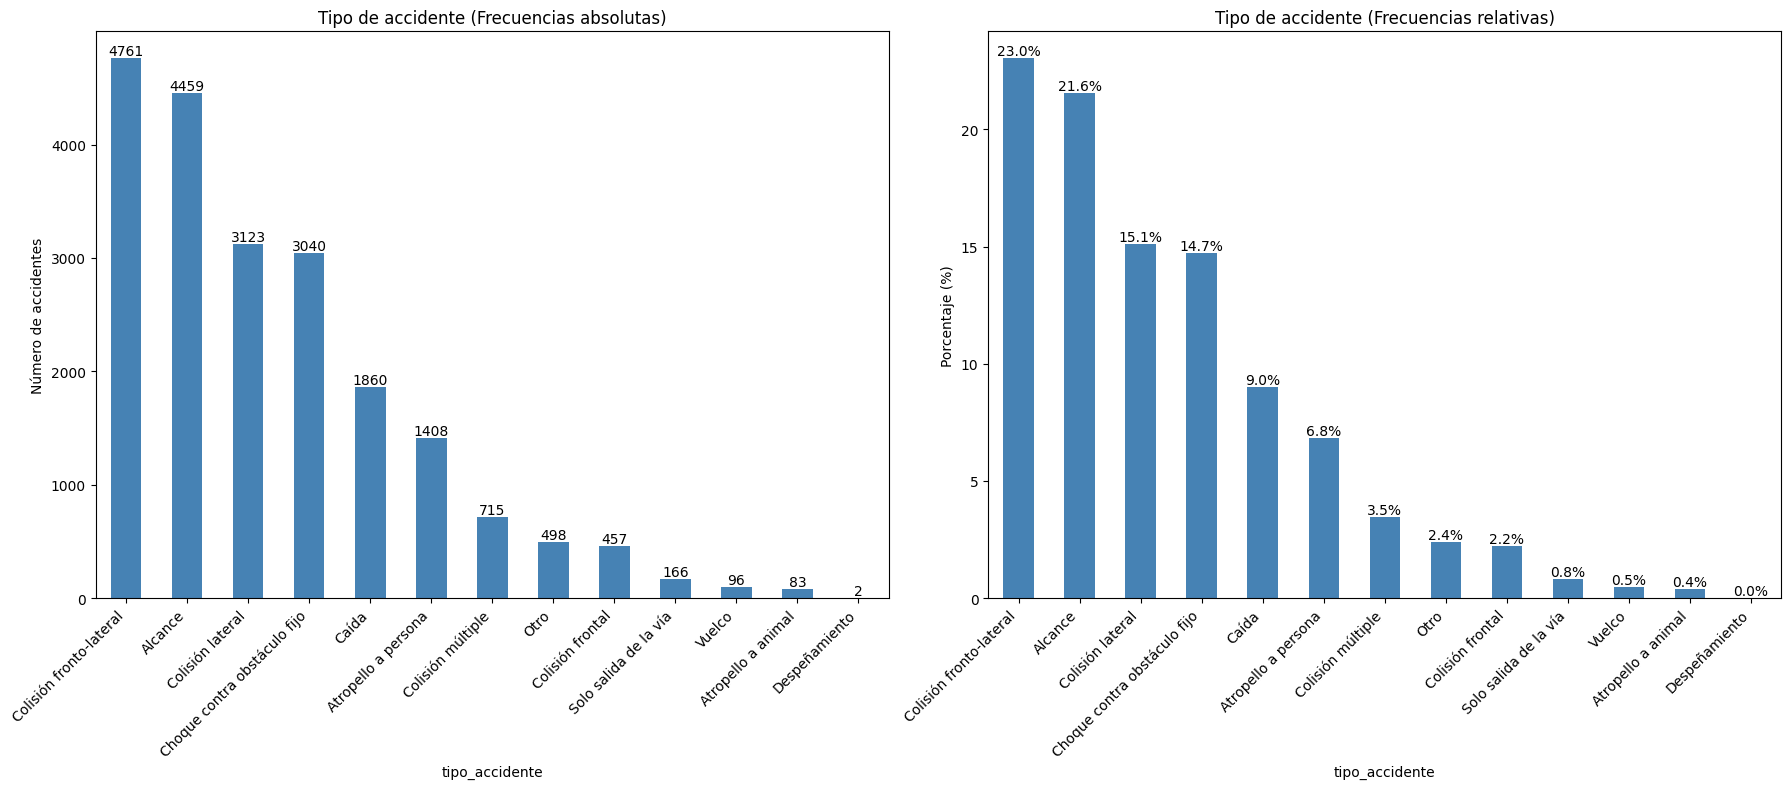

In [37]:
# Crear columna limpia
df = df_2023.copy()
df["tipo_accidente_limpio"] = df["tipo_accidente"].str.strip().str.lower()

# Filtrar "no consta" 
df_filtrado = df[df["tipo_accidente_limpio"] != "no consta"]

# Calcular frecuencias absolutas
abs_freq = (
    df_filtrado
    .groupby("tipo_accidente", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Eliminar categorías con valor 0 (por si acaso)
abs_freq = abs_freq[abs_freq > 0]

# Calcular frecuencias relativas 
rel_freq = abs_freq / abs_freq.sum() * 100

# Eliminar categorías con valor 0 (por si acaso) 
rel_freq = rel_freq[rel_freq > 0]

# Crear gráfico 
plt.figure(figsize=(18, 8))

# Frecuencias absolutas
plt.subplot(1, 2, 1)
abs_freq.plot(kind="bar", color="steelblue")

plt.title("Tipo de accidente (Frecuencias absolutas)")
plt.ylabel("Número de accidentes")
plt.xticks(rotation=45, ha="right")

# Etiquetas numéricas encima de cada barra
for i, v in enumerate(abs_freq):
    plt.text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()

# Frecuencias relativas
plt.subplot(1, 2, 2)
rel_freq.plot(kind="bar", color="steelblue")

plt.title("Tipo de accidente (Frecuencias relativas)")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

# Etiquetas numéricas encima de cada barra
for i, v in enumerate(rel_freq):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

De nuevo la colisión fronto-lateral, representa casi una cuarta parte de todos los accidentes registrados. Junto con alcance, colisión lateral y choque contra obstáculo fijo suman más del 70%. 

### Análisis univariante por tipo de persona implicada en los accidentes y por vehículo

C:\Users\lufue\AppData\Local\Temp\ipykernel_37620\2941646063.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(abs_freq.index, rotation=45, ha="right")
C:\Users\lufue\AppData\Local\Temp\ipykernel_37620\2941646063.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rel_freq.index, rotation=45, ha="right")


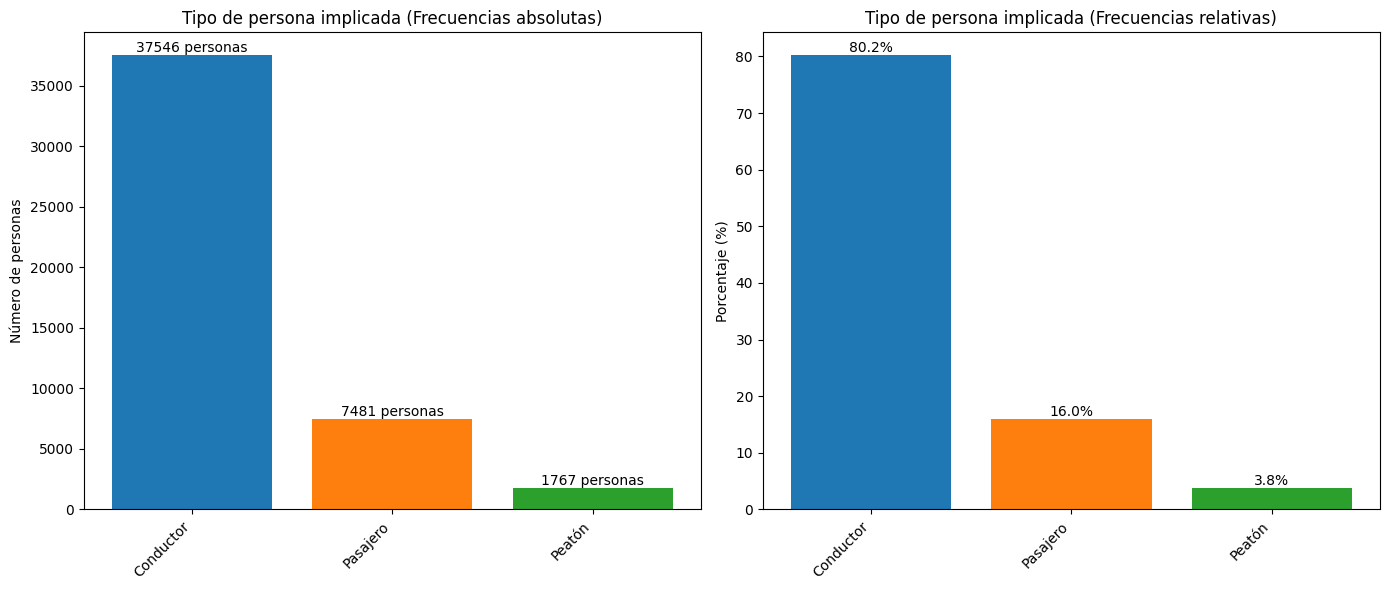

In [40]:
# Frecuencias absolutas (personas)
abs_freq = (
    df_2023["tipo_persona"]
    .value_counts()
)

# Frecuencias relativas (%)
rel_freq = abs_freq / abs_freq.sum() * 100

# Paleta de colores consistente
colors = sns.color_palette("tab10", n_colors=len(abs_freq))

# Crear figura con dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Absolutas (izquierda) 
axes[0].bar(abs_freq.index, abs_freq.values, color=colors)
axes[0].set_title("Tipo de persona implicada (Frecuencias absolutas)")
axes[0].set_ylabel("Número de personas")

# Rotación y alineación de etiquetas del eje X
axes[0].set_xticklabels(abs_freq.index, rotation=45, ha="right")

# Etiquetas encima de cada barra
for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v} personas", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas (derecha)
axes[1].bar(rel_freq.index, rel_freq.values, color=colors)
axes[1].set_title("Tipo de persona implicada (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")

# Rotación y alineación de etiquetas del eje X
axes[1].set_xticklabels(rel_freq.index, rotation=45, ha="right")

# Etiquetas encima de cada barra
for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

Los conductores es el principal grupo involucrado en accidentes, representando un 80%. Los peatones son los menos involucrados, pero los más vulnerables.

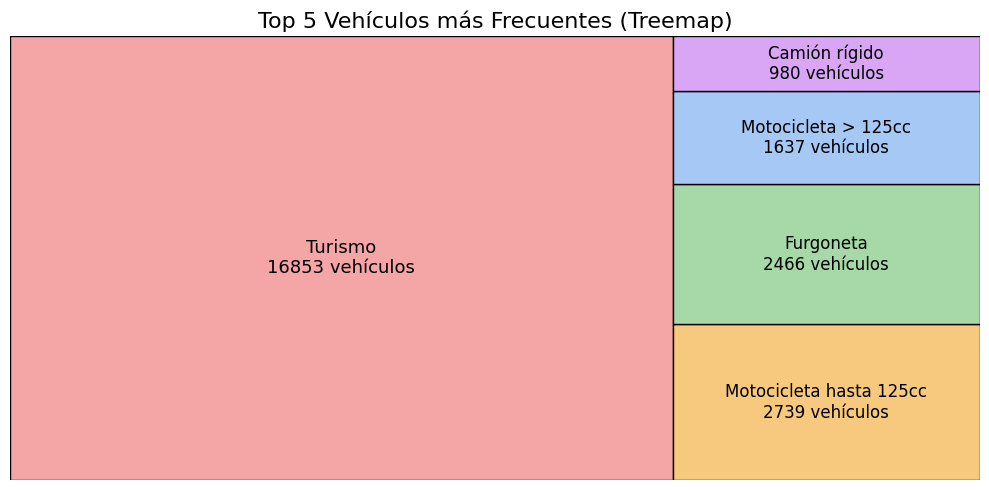

In [41]:
from matplotlib.patches import Rectangle

# 1. Filtrar solo conductores 
df_conductores = df_2023[
    df_2023["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Evitar duplicados reales 
df_vehiculos = df_conductores[["num_expediente", "tipo_vehiculo"]].drop_duplicates()

# 3. Contar los 5 vehículos más frecuentes 
vehiculo_freq = (
    df_vehiculos["tipo_vehiculo"]
    .str.strip()
    .value_counts()
    .head(5)
)

labels = vehiculo_freq.index.tolist()
sizes = vehiculo_freq.values.tolist()

# 4. Normalizar tamaños 
total = sum(sizes)
norm_sizes = [s / total for s in sizes]

# 5. Crear treemap estilo “bloque grande + 4 apilados”
fig, ax = plt.subplots(figsize=(10, 5))

# Área total
W, H = 100, 100

# Bloque principal (izquierda)
main_width = W * norm_sizes[0]          # proporcional
main_height = H

# Dibujar bloque principal
ax.add_patch(Rectangle((0, 0), main_width, main_height,
                       facecolor="#f4a6a6", edgecolor="black"))
ax.text(main_width/2, main_height/2,
        f"{labels[0]}\n{sizes[0]} vehículos",
        ha="center", va="center", fontsize=13)

# Bloques apilados (derecha)
x_right = main_width
y = 0
right_width = W - main_width

# Normalizar tamaños de los 4 restantes dentro del área derecha
rest_sizes = norm_sizes[1:]
rest_total = sum(rest_sizes)
rest_norm = [s / rest_total for s in rest_sizes]

colores = ["#f7c97f", "#a6d8a8", "#a6c8f4", "#d8a6f4"]

for i in range(4):
    block_height = H * rest_norm[i]     # proporcional
    ax.add_patch(Rectangle((x_right, y), right_width, block_height,
                           facecolor=colores[i], edgecolor="black"))
    ax.text(x_right + right_width/2, y + block_height/2,
            f"{labels[i+1]}\n{sizes[i+1]} vehículos",
            ha="center", va="center", fontsize=12)
    y += block_height

# ------------------ 6. Estética final ------------------
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")
plt.title("Top 5 Vehículos más Frecuentes (Treemap)", fontsize=16)
plt.tight_layout()
plt.show()

El turismo es el vehículo más implicado con diferencia, seguido de las motocicletas (125cc y > 125cc) aunque en menor medida.

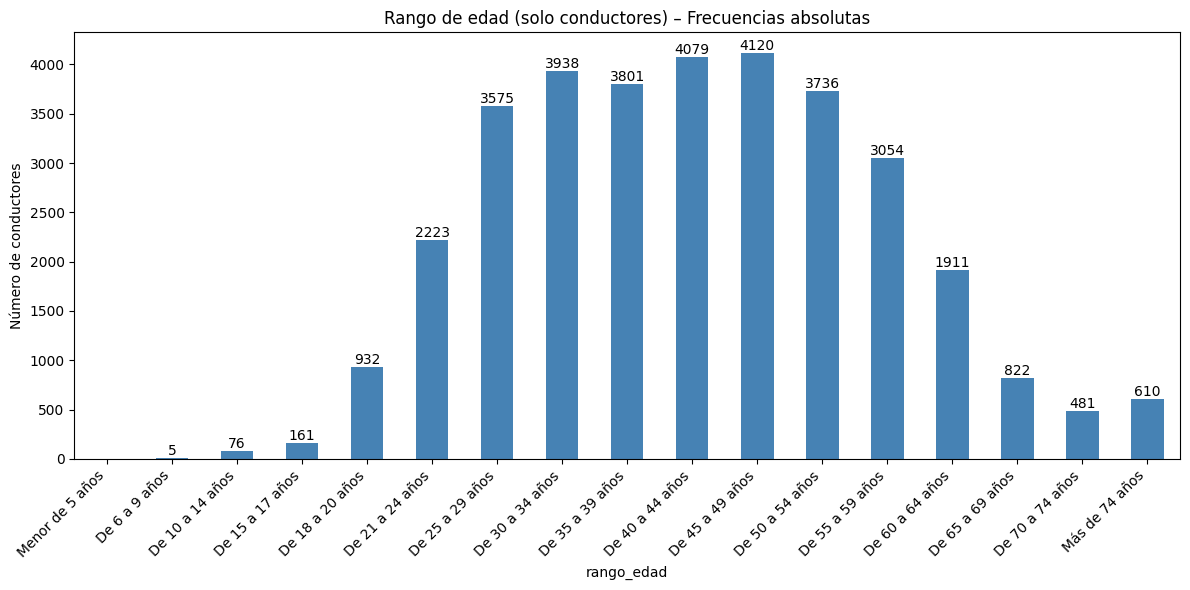

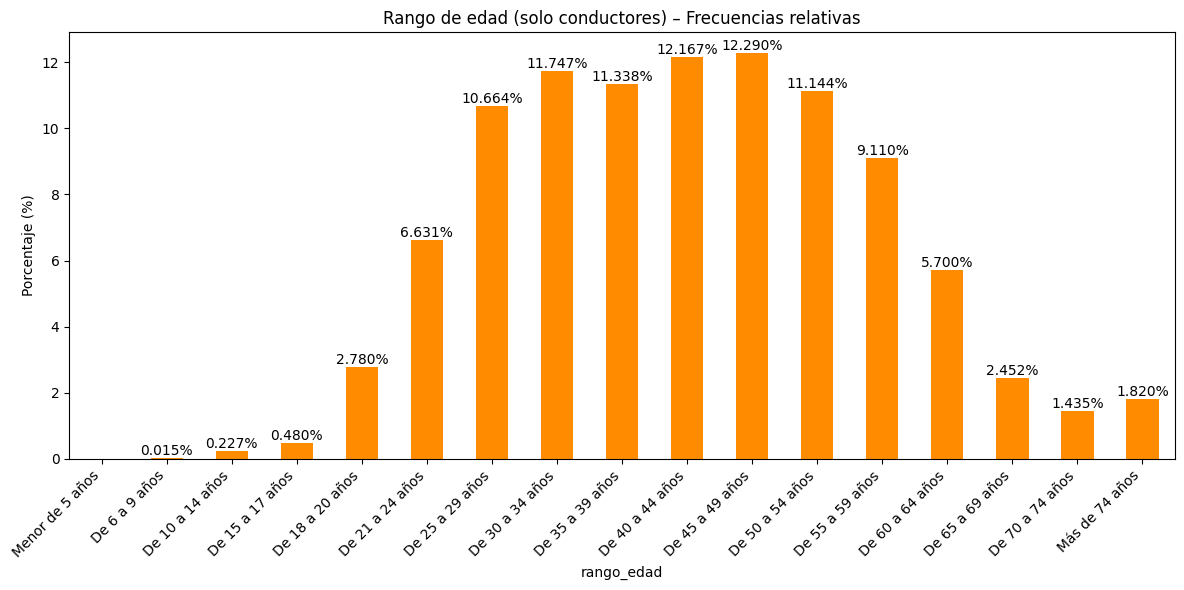

In [42]:
# 1. Filtrar solo conductores 
df_conductores = df_2023[
    df_2023["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Eliminar categoría "Desconocido" 
df_conductores = df_conductores[
    df_conductores["rango_edad"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto de rangos de edad 
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df_conductores["rango_edad"] = df_conductores["rango_edad"].str.strip()
df_conductores["rango_edad"] = df_conductores["rango_edad"].astype("category")
df_conductores["rango_edad"] = df_conductores["rango_edad"].cat.set_categories(
    orden_edad, ordered=True
)

# 4. Frecuencias
edad_abs = df_conductores["rango_edad"].value_counts().sort_index()
edad_rel = edad_abs / edad_abs.sum() * 100

# 5. Gráfico de frecuencias absolutas 
plt.figure(figsize=(12, 6))
edad_abs.plot(kind="bar", color="steelblue")

plt.title("Rango de edad (solo conductores) – Frecuencias absolutas")
plt.ylabel("Número de conductores")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_abs):
    if v > 0:
        plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 6. Gráfico de frecuencias relativas 
plt.figure(figsize=(12, 6))
edad_rel.plot(kind="bar", color="darkorange")

plt.title("Rango de edad (solo conductores) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_rel):
    if v > 0:
        plt.text(i, v, f"{v:.3f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

Dentro del grupo de conductores, el mayor número y porcentaje de accidentes se concentra entre los 25 y 54 años. A partir de ahí hay un descenso progresivo. El grupo de mayores de 74 años es mayor que el de 70-74 debido a que abarca mayor rango de edad. Los menores de 18 años no representan ni el 1%. Y entre los de 18 años y 25, representan menos del 10%.

A continuación veamos si hay posibles ilegalidades:

In [43]:
df_conductores_6_9 = df_2023[
    (df_2023["tipo_persona"].str.strip().str.lower() == "conductor") &
    (df_2023["rango_edad"].str.strip() == "De 6 a 9 años")
]

df_conductores_6_9.tipo_vehiculo.unique()

['VMU eléctrico', 'Bicicleta', 'Patinete no eléctrico']
Categories (36, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tren/metro', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

En el caso de VMU eléctrico no es recomendado para menores de 15 años. Pero no es incoherente, al igual que las bicicletas y el patinete no eléctrico.

In [44]:
df_2023.tipo_vehiculo.value_counts().index

CategoricalIndex(['Turismo', 'Motocicleta hasta 125cc', 'Furgoneta',
                  'Motocicleta > 125cc', 'Autobús', 'Camión rígido',
                  'VMU eléctrico', 'Todo terreno', 'Bicicleta', 'Ciclomotor',
                  'No consta', 'Bicicleta EPAC (pedaleo asistido)',
                  'Tractocamión', 'Maquinaria de obras',
                  'Otros vehículos con motor', 'Autobús articulado',
                  'Vehículo articulado', 'Sin especificar', 'No aplica',
                  'Cuadriciclo ligero', 'Ciclo', 'Autobus EMT', 'Tren/metro',
                  'Autocaravana', 'Moto de tres ruedas > 125cc',
                  'Cuadriciclo no ligero', 'Otros vehículos sin motor',
                  'Patinete no eléctrico', 'Ambulancia SAMUR', 'Semiremolque',
                  'Remolque', 'Ciclomotor de dos ruedas L1e-B',
                  'Microbús <= 17 plazas', 'Autobús articulado EMT',
                  'Camión de bomberos', 'Ciclo de motor L1e-A'],
                 categori

In [45]:
vehiculos_legales = ['VMU eléctrico', 'Bicicleta', 'Bicicleta EPAC (pedaleo asistido)',
                     'Otros vehículos sin motor', 'Patinete no eléctrico']

df_10_14_ilegales = df_2023[
    (df_2023["tipo_persona"].str.lower().str.strip() == "conductor") &
    (df_2023["rango_edad"].str.strip() == "De 10 a 14 años") &
    (~df_2023["tipo_vehiculo"].isin(vehiculos_legales))
]

df_10_14_ilegales.tipo_vehiculo.unique()

['Turismo', 'Furgoneta']
Categories (36, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tren/metro', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

Tanto el turismo como la furgoneta son vehículos que legalmente personas entre 10 y 14 años no pueden conducir, por tanto, puede ser un error de registro en el campo 'tipo_persona','rango_edad' o 'tipo_vehiculo'.

In [46]:
vehiculos_legales = ['VMU eléctrico', 'Bicicleta', 'Bicicleta EPAC (pedaleo asistido)',
                     'Otros vehículos sin motor', 'Patinete no eléctrico',
                     'Ciclomotor', 'Cuadriciclo ligero', 'Ciclo',
                     ]

# 2. Filtrar conductores de 15 a 17 años que aparecen con vehículos ilegales
df_15_17_ilegales = df_2023[
    (df_2023["tipo_persona"].str.lower().str.strip() == "conductor") &
    (df_2023["rango_edad"].str.strip() == "De 15 a 17 años") &
    (~df_2023["tipo_vehiculo"].isin(vehiculos_legales))
]

# 3. Mostrar resultado
df_15_17_ilegales.tipo_vehiculo.unique()

['Motocicleta > 125cc', 'Turismo', 'Motocicleta hasta 125cc', 'Furgoneta', 'Camión rígido']
Categories (36, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tren/metro', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

De nuevo o están comentiendo una ilegalidad o son errores de registro.

Ahora analizamos por rango de edad independientemente de si la persona es conductor, pasajero o peatón:

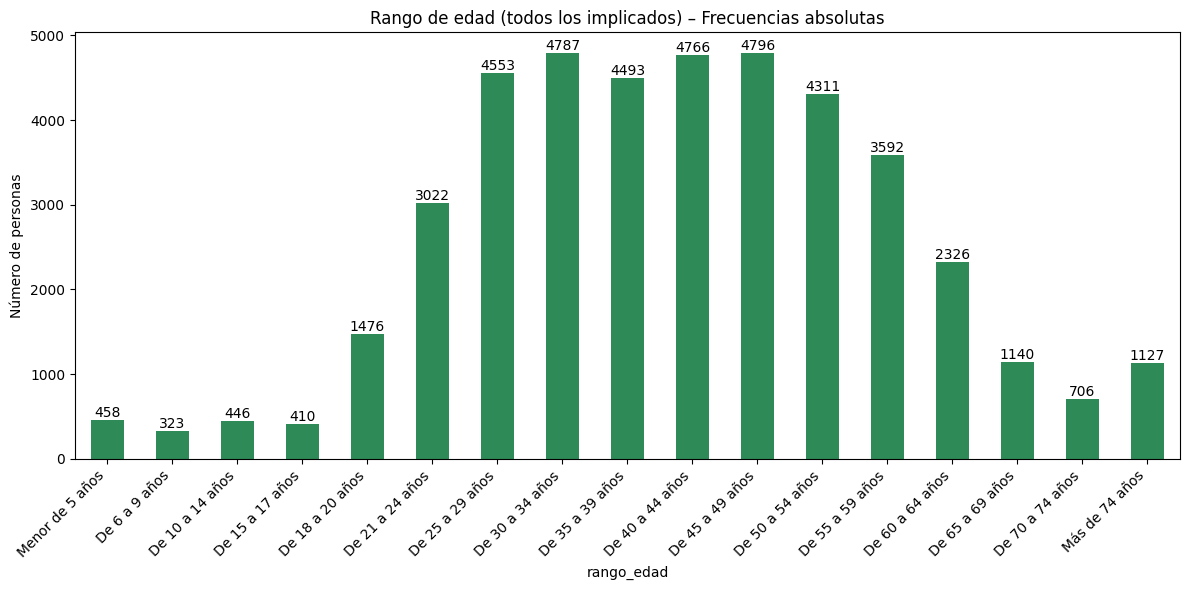

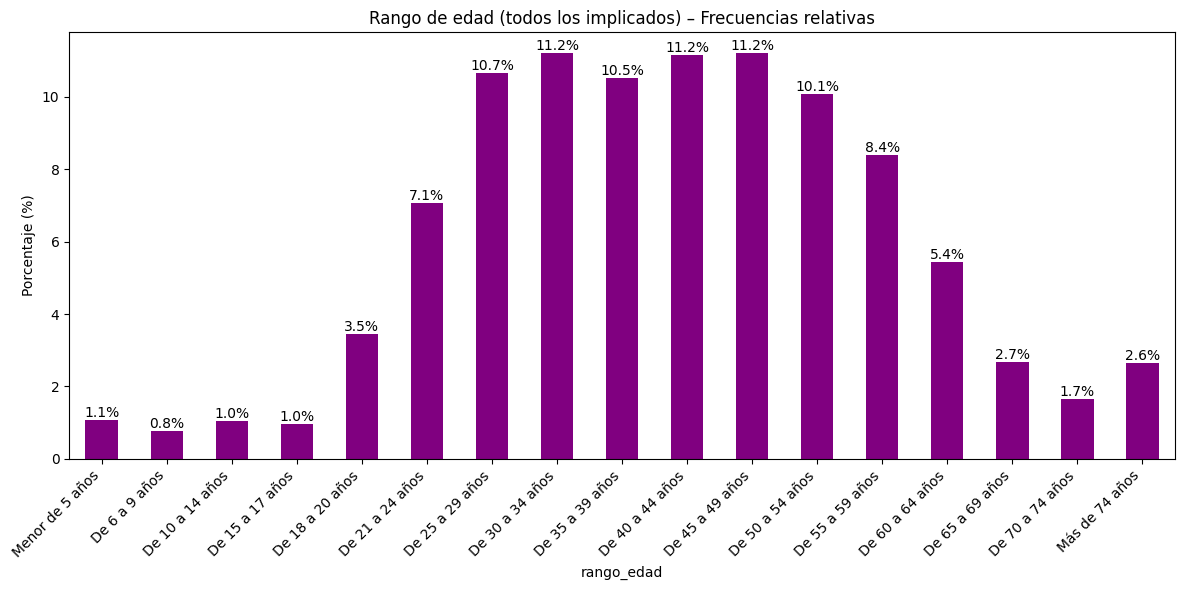

In [47]:
# 1. Dataset completo (todos los implicados) 
df_todos = df_2023.copy()

# 2. Eliminar categoría "Desconocido" 
df_todos = df_todos[
    df_todos["rango_edad"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto de rangos de edad 
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df_todos["rango_edad"] = df_todos["rango_edad"].str.strip()
df_todos["rango_edad"] = df_todos["rango_edad"].astype("category")
df_todos["rango_edad"] = df_todos["rango_edad"].cat.set_categories(
    orden_edad, ordered=True
)

# 4. Frecuencias absolutas 
edad_abs_all = df_todos["rango_edad"].value_counts().sort_index()

# 5. Frecuencias relativas (%) 
edad_rel_all = edad_abs_all / edad_abs_all.sum() * 100

# 6. Gráfico de frecuencias absolutas 
plt.figure(figsize=(12, 6))
edad_abs_all.plot(kind="bar", color="seagreen")

plt.title("Rango de edad (todos los implicados) – Frecuencias absolutas")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_abs_all):
    if v > 0:
        plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 7. Gráfico de frecuencias relativas 
plt.figure(figsize=(12, 6))
edad_rel_all.plot(kind="bar", color="purple")

plt.title("Rango de edad (todos los implicados) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_rel_all):
    if v > 0:
        plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

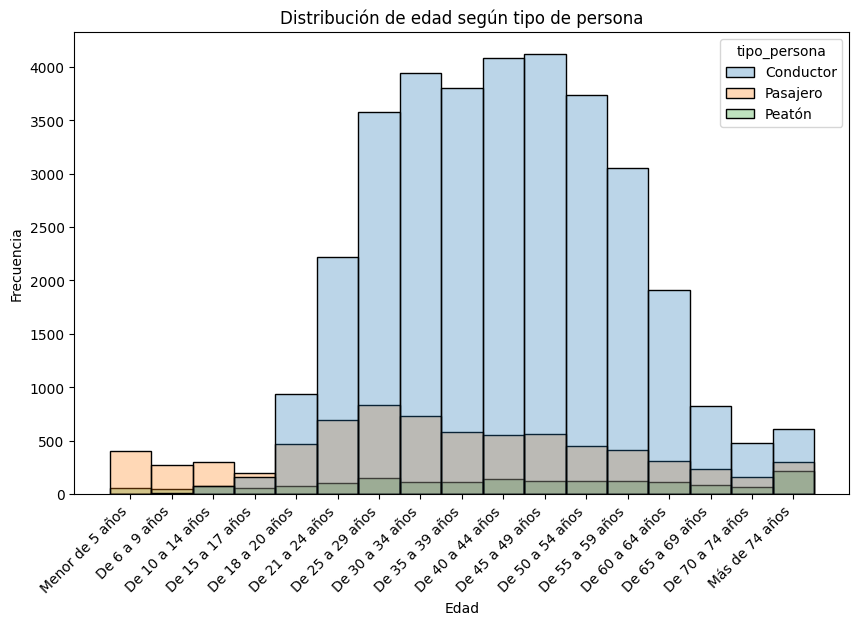

In [48]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_todos,
    x="rango_edad",             
    hue="tipo_persona",    
    bins=30,
    stat="count",           
    common_norm=False,       
    alpha=0.3
)

plt.title("Distribución de edad según tipo de persona")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")

plt.show()


Ahora vamos a analizar la distribución por sexo:

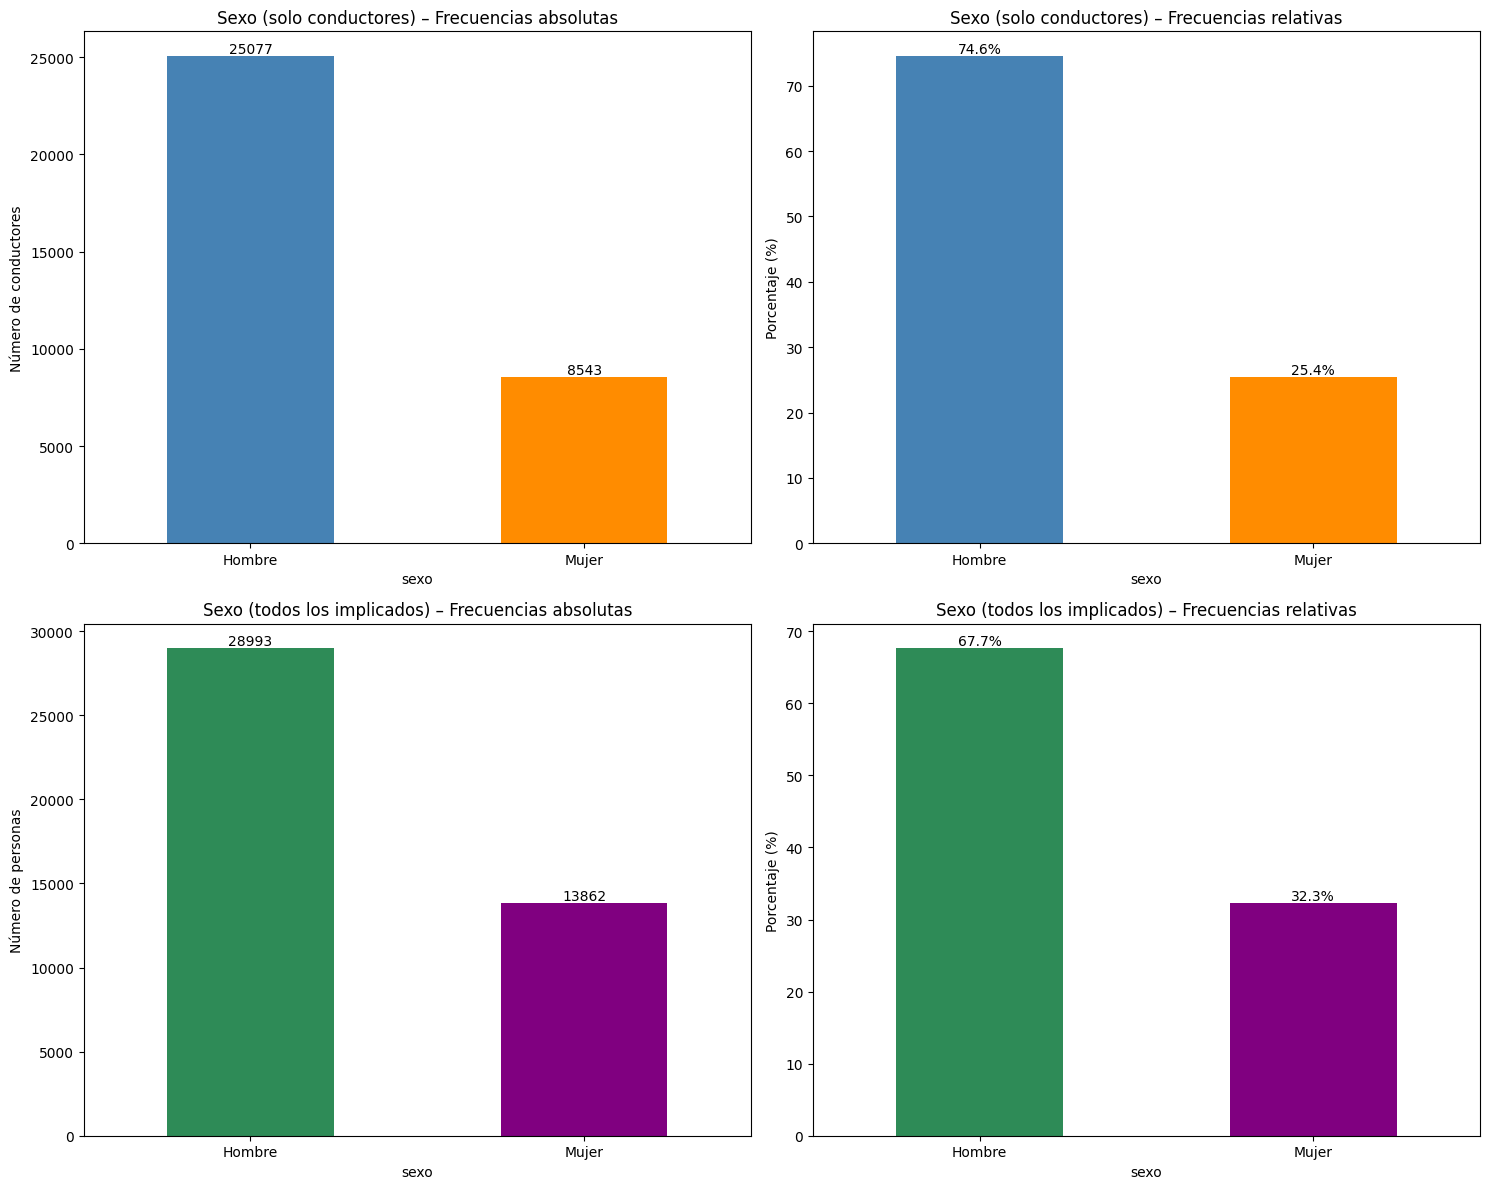

In [49]:
# Filtrar solo conductores 
df_conductores = df_2023[
    df_2023["tipo_persona"].str.strip().str.lower() == "conductor"
]

# Eliminar "Desconocido"
df_conductores = df_conductores[
    df_conductores["sexo"].str.strip().str.lower() != "desconocido"
]

# Orden correcto 
orden_sexo = ["Hombre", "Mujer"]

df_conductores["sexo"] = df_conductores["sexo"].str.strip()
df_conductores["sexo"] = df_conductores["sexo"].astype("category")
df_conductores["sexo"] = df_conductores["sexo"].cat.set_categories(
    orden_sexo, ordered=True
)

# Frecuencias 
sexo_abs = df_conductores["sexo"].value_counts().sort_index()
sexo_rel = sexo_abs / sexo_abs.sum() * 100

# Crear figura
plt.figure(figsize= (15, 12))

# Gráfico de frecuencias absolutas (solo conductores)
plt.subplot(2, 2, 1)
sexo_abs.plot(kind="bar", color=["steelblue", "darkorange"])

plt.title("Sexo (solo conductores) – Frecuencias absolutas")
plt.ylabel("Número de conductores")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_abs):
    plt.text(i, v, f"{v}", ha="center", va="bottom")

# Gráfico de frecuencias relativas (solo conductores)
plt.subplot(2, 2, 2)
sexo_rel.plot(kind="bar", color=["steelblue", "darkorange"])

plt.title("Sexo (solo conductores) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_rel):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

# Dataset completo 
df_todos = df_2023.copy()

# Eliminar "Desconocido" 
df_todos = df_todos[
    df_todos["sexo"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto 
df_todos["sexo"] = df_todos["sexo"].str.strip()
df_todos["sexo"] = df_todos["sexo"].astype("category")
df_todos["sexo"] = df_todos["sexo"].cat.set_categories(
    orden_sexo, ordered=True
)

# Frecuencias 
sexo_abs_all = df_todos["sexo"].value_counts().sort_index()
sexo_rel_all = sexo_abs_all / sexo_abs_all.sum() * 100

# Gráfico de frecuencias absolutas (todos)
plt.subplot(2, 2, 3)
sexo_abs_all.plot(kind="bar", color=["seagreen", "purple"])

plt.title("Sexo (todos los implicados) – Frecuencias absolutas")
plt.ylabel("Número de personas")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_abs_all):
    plt.text(i, v, f"{v}", ha="center", va="bottom")

# Gráfico de frecuencias relativas (todos)
plt.subplot(2, 2, 4)
sexo_rel_all.plot(kind="bar", color=["seagreen", "purple"])

plt.title("Sexo (todos los implicados) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_rel_all):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

- Se puede observar que tres partes de los conductores implicados en accidentes son hombres. Esto se puede deber a mayor número de hombres al volante, más que porque tengan mayor tendencia a tener accidentes.
- En las dos últimas gráficas, se puede observar que los hombres siguen siendo mayoría (más de la mitad). Pero recordar que aproximadamente el 80% eran conductores y casi el 75% de los conductores involucrados en accidentes son hombres.

### Análisis univariante de lesividad

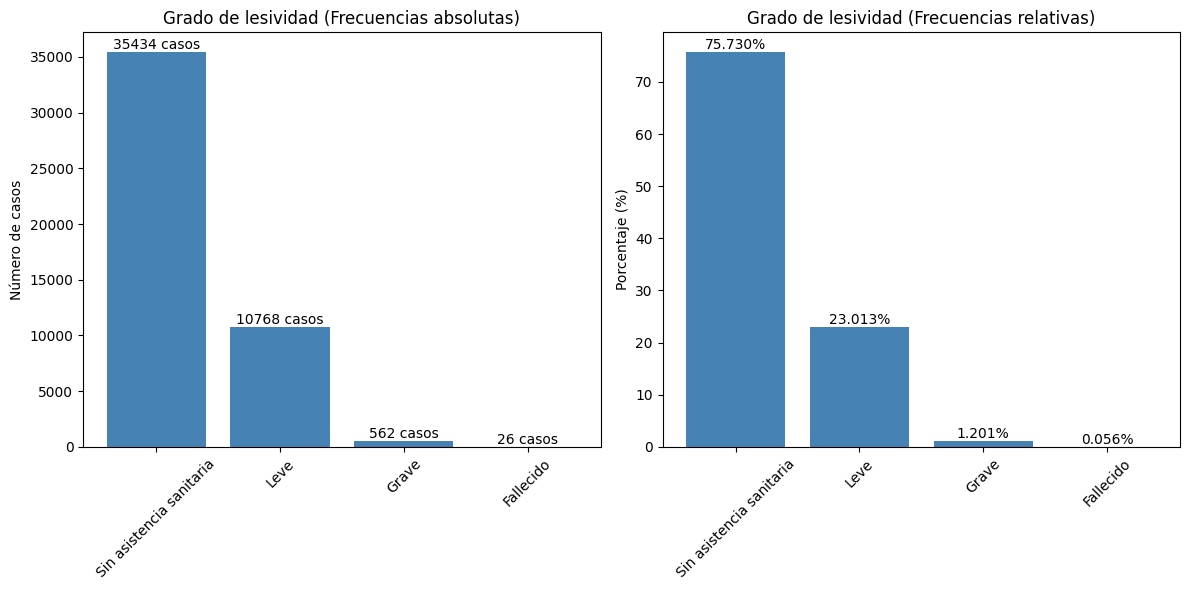

In [50]:
import re

# Función de limpieza profunda 
def limpiar_texto(x):
    x = str(x)
    x = unicodedata.normalize("NFKC", x)       # normaliza caracteres raros
    x = x.replace("\u00A0", " ")               # elimina NO-BREAK SPACE
    x = re.sub(r"\s+", " ", x)                 # colapsa espacios múltiples
    return x.strip().lower()

# Normalizar columna 
lesividad_norm = df_2023["grado_lesividad"].apply(limpiar_texto)

# Excluir variantes de "no consta" y "se desconoce" 
valores_excluir = ["no consta", "se desconoce"]
lesividad_filtrado = lesividad_norm[~lesividad_norm.isin(valores_excluir)]

# Recontar sobre columna limpia 
abs_freq = lesividad_filtrado.value_counts()
rel_freq = abs_freq / abs_freq.sum() * 100

# Eliminar categorías con frecuencia 0 
abs_freq = abs_freq[abs_freq > 0]
rel_freq = rel_freq[rel_freq > 0]

# Mapear nombres legibles 
etiquetas_legibles = {
    "sin asistencia sanitaria": "Sin asistencia sanitaria",
    "leve": "Leve",
    "grave": "Grave",
    "fallecido": "Fallecido"
}

abs_freq.index = [etiquetas_legibles.get(cat, cat.title()) for cat in abs_freq.index]
rel_freq.index = abs_freq.index  # sincronizar índices

# Crear figura 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color = "steelblue"

# Gráfico 1: Absolutas 
axes[0].bar(abs_freq.index, abs_freq.values, color=color)
axes[0].set_title("Grado de lesividad (Frecuencias absolutas)")
axes[0].set_ylabel("Número de casos")
axes[0].tick_params(axis="x", rotation=45)

for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v} casos", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas 
axes[1].bar(rel_freq.index, rel_freq.values, color=color)
axes[1].set_title("Grado de lesividad (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis="x", rotation=45)

for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.3f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

- Tres cuartas partes no necesitaron asistencia sanitaria.
- Un 23% sí recibió asistencia médica, sin ingreso o con ingreso, pero inferior o igual a 24 horas.
- Los de grado de lesividad grave o fallecidos representan poco más del 1%, pero importante de analizar en el bivariante.

### Análisis univariante de alcohol

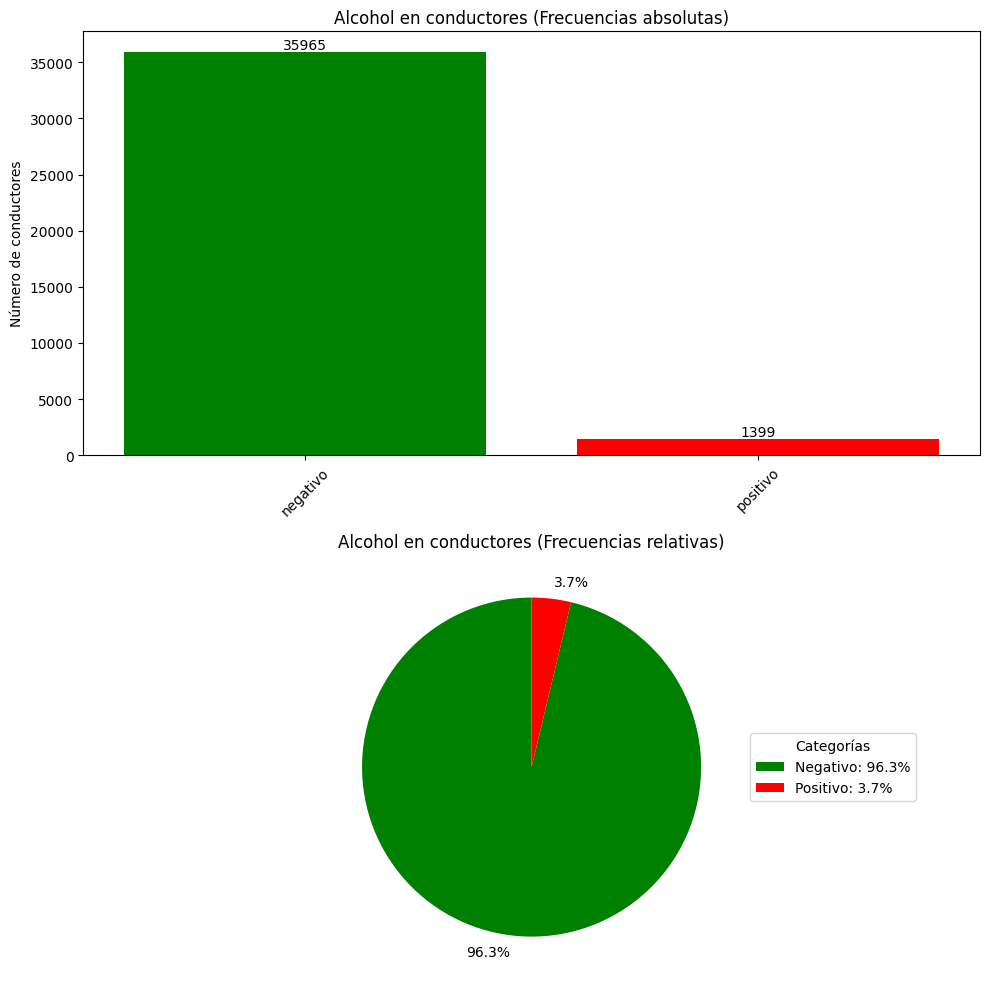

In [51]:
# Filtrar solo conductores 
df_conductores = df_2023[
    df_2023["tipo_persona"].str.lower() == "conductor"
]

# Normalizar columna antes de contar 
alcohol_col = (
    df_conductores["positiva_alcohol"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Excluir "no consta" 
alcohol_filtrado = alcohol_col[alcohol_col != "no consta"]

# Recontar sobre columna ya limpia 
abs_freq = alcohol_filtrado.value_counts()
rel_freq = abs_freq / abs_freq.sum() * 100

#Paleta de colores personalizada
color_map = {
    "positivo": "red",
    "negativo": "green",
}

colors = [color_map.get(cat, "white") for cat in abs_freq.index]

# Crear figura 
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

#1. Gráfico de barras (absolutos)
ax[0].bar(abs_freq.index, abs_freq.values, color=colors)
ax[0].set_title("Alcohol en conductores (Frecuencias absolutas)")
ax[0].set_ylabel("Número de conductores")
ax[0].tick_params(axis="x", rotation=45)

for i, v in enumerate(abs_freq):
    ax[0].text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

#2. Gráfico de tarta (porcentajes bien posicionados)
# Pie chart sin etiquetas internas
wedges, _ = ax[1].pie(
    rel_freq,
    labels=None,
    autopct=None,
    startangle=90,
    colors=colors,
    radius=1
)

ax[1].set_title("Alcohol en conductores (Frecuencias relativas)")

# Añadir etiquetas externas alineadas con cada segmento
for i, (wedge, pct) in enumerate(zip(wedges, rel_freq.values)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    label_x = 1.1 * x
    label_y = 1.1 * y
    ha = "left" if x > 0 else "right"
    ax[1].text(label_x, label_y, f"{pct:.1f}%", ha=ha, va="center", fontsize=10)

# Leyenda con nombre + porcentaje
legend_labels = [f"{cat.capitalize()}: {pct:.1f}%" for cat, pct in zip(rel_freq.index, rel_freq.values)]

ax[1].legend(
    wedges,
    legend_labels,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

Un 96% de los conductores han dado negativo en alcohol. A simple vista puede parecer que el alcohol no influye, pero lo veremos en el análisis bivariante...

### Análisis univariante del estado meteorológico

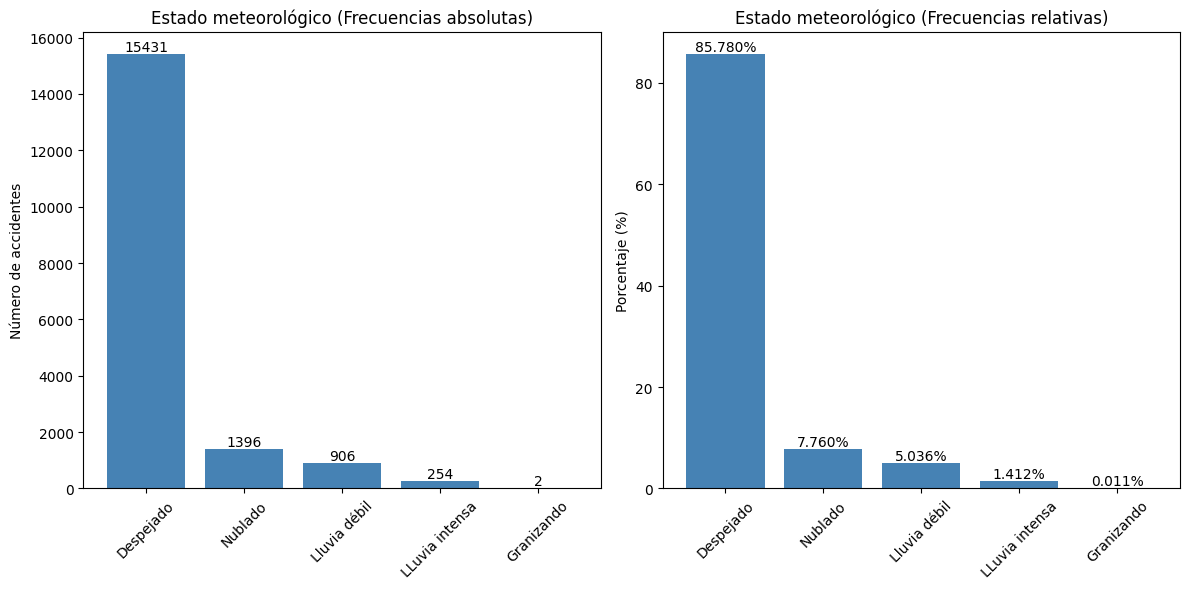

In [52]:
#  Normalizar columna para filtrar 
# Creamos una columna auxiliar normalizada para filtrar correctamente
df_2023["estado_meteorológico_normalizado"] = (
    df_2023["estado_meteorológico"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Filtrar para visualización 
df_meteo = df_2023[
    df_2023["estado_meteorológico_normalizado"] != "se desconoce"
]

# Agrupar usando la columna original
# Esto conserva los nombres originales (con mayúsculas y acentos) en el gráfico
abs_freq = (
    df_meteo
    .groupby("estado_meteorológico", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Eliminar categorías con frecuencia 0 
abs_freq = abs_freq[abs_freq > 0]
rel_freq = abs_freq / abs_freq.sum() * 100
rel_freq = rel_freq[rel_freq > 0]

# Crear figura con dos subplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color = "steelblue"

# Gráfico 1: Absolutas 
axes[0].bar(abs_freq.index, abs_freq.values, color=color)
axes[0].set_title("Estado meteorológico (Frecuencias absolutas)")
axes[0].set_ylabel("Número de accidentes")
axes[0].tick_params(axis="x", rotation=45)
for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas 
axes[1].bar(rel_freq.index, rel_freq.values, color=color)
axes[1].set_title("Estado meteorológico (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis="x", rotation=45)
for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.3f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

En Madrid la mayoría de días son con cielo despejado, lo que implica que casi el 86% de los accidentes ocurran en un día despejado. Pero la conducción tiene más riesgos en días nublados, de lluvia o granizado, por eso lo analizaremos en el bivariante.

# Análisis bivariante

### Análisis bivariante Geográfico: Distribución de los tipos de accidente por distrito

- ¿Cómo se distribuyen los tipos de accidente significativos en cada distrito?

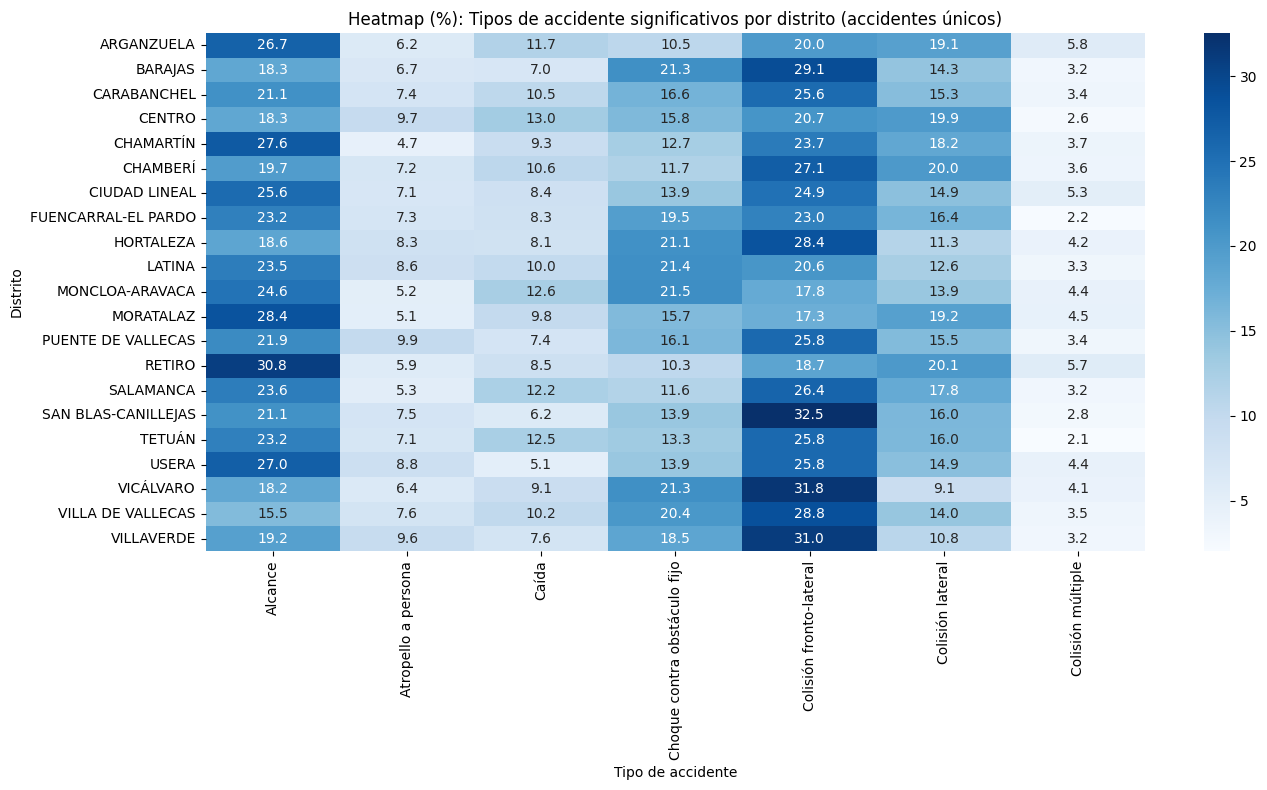

In [53]:
# 1. Definir los tipos de accidente significativos
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

# 2. Filtrar el DataFrame original
df_filtrado = df_2023[
    df_2023["tipo_accidente"].isin(tipos_significativos)
]

# 3. Tabla de contingencia con expedientes únicos
tabla_contingencia = pd.crosstab(
    df_filtrado["distrito"],
    df_filtrado["tipo_accidente"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 4. Convertir a porcentajes por fila (por distrito)
tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

# 5. Heatmap en porcentajes
plt.figure(figsize=(14,8))
sns.heatmap(tabla_porcentajes, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap (%): Tipos de accidente significativos por distrito (accidentes únicos)")
plt.xlabel("Tipo de accidente")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()

El heatmap muestra la proporción de cada tipo de accidente dentro de cada distrito, considerando solo expedientes únicos.

Recordatorio de frecuencias por tipo de accidente:
- Colisión fronto-lateral: 23%
- Alcance: 21.6% 
- Colisión lateral: 15.1%
- Choque contra obstáculo fijo: 14.7%

1. En todos los distritos predominan accidentes por alcance o colisiones fronto-lateral, que entre los dos representan un 44.6% de los tipos de accidente. Los accidentes por colisión lateral también están bastante presentes en casi todos los distritos.
2. En los distritos menos céntricos, además de los top 3 accidentes, los choques contra obstáculos fijos están alrededor del 20%.

- ¿Hay relación estadística entre distrito y tipo de accidente?

In [54]:
# 6. Test chi-cuadrado (se hace sobre la tabla de frecuencias absolutas)
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 712.1394378068435
P-Value: 6.883645313664921e-85
Grados de Libertad: 120
Tabla de Frecuencias Esperadas:
 [[203.54001859  64.2709904   84.90343902 138.76691108 217.32541568
  142.55561293  32.63761231]
 [ 85.42233812  26.97345864  35.6325519   58.23814933  91.20783848
   59.82820407  13.69745947]
 [294.02783228  92.84395332 122.64897243 200.45853558 313.94180523
  205.93158112  47.14732005]
 [297.02106785  93.78911494 123.89755241 202.49922545 317.13776722
  208.02798719  47.62728493]
 [301.62604565  95.24320975 125.8184447  205.63874832 322.05463183
  211.25322731  48.36569245]
 [202.15852525  63.83476195  84.32717133 137.82505422 215.85035629
  141.5880409   32.41609005]
 [271.0029433   85.57347929 113.044511   184.7609212  289.35748219
  189.80538056  43.45528245]
 [257.64850769  81.35660436 107.47392337 175.65630486 275.09857482
  180.45218424  41.31390065]
 [171.07492513  54.01962202  71.3611484  116.63327481 182.66152019
  119.81767014  27.43183931]
 [205.3820

Comos el test Chi-Cuadrado nos da un p-valor muy pequeño, (<< 0.05), podemos rechazar las hipótesis nula de que las variables sean independientes. Por tanto, hay una relación estadísticamente significativa.

### Análisis bivariante por tipo de Accidente: Distribución de tipos de accidente según resultado de alcohol en conductores

- Distribución

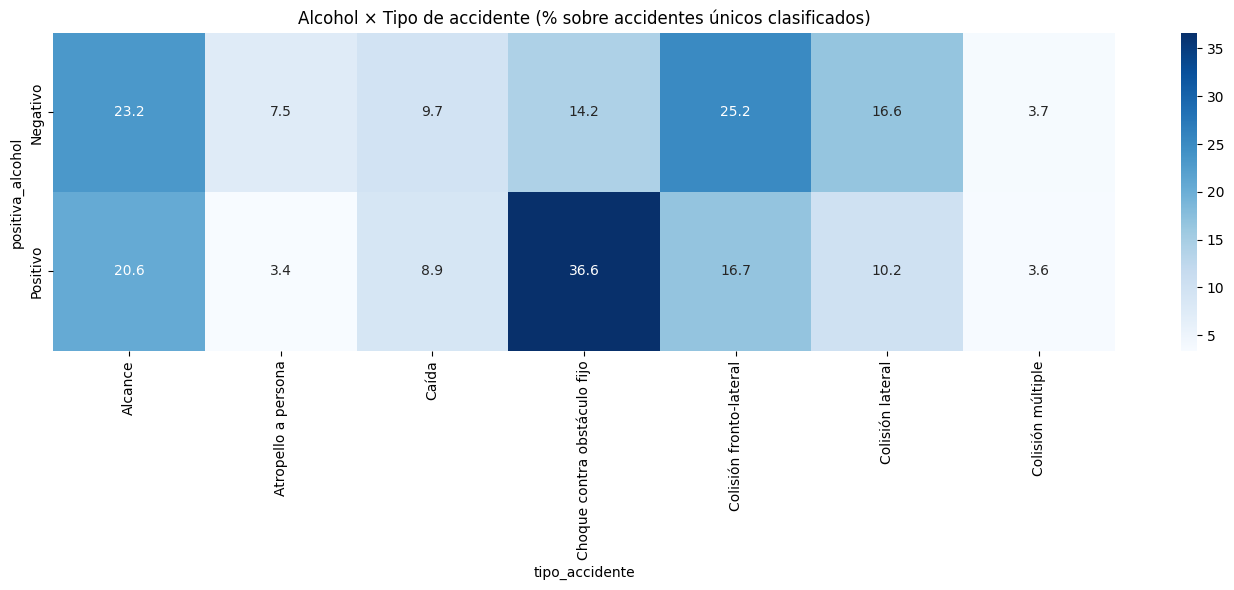

In [55]:
# 1. Filtrar solo conductores + tipos relevantes
df_conductores = df_2023[
    (df_2023["tipo_persona"].str.lower() == "conductor") &
    (df_2023["tipo_accidente"].isin(tipos_significativos))
]

# 2. Quitar "No consta" en alcohol
df_conductores = df_conductores[
    df_conductores["positiva_alcohol"] != "No consta"
]

# 4. Clasificar accidentes:
#    - Si algún conductor dio "Positivo" → "Positivo"
#    - Si todos dieron "Negativo" → "Negativo"
clasificacion_accidentes = (
    df_conductores
    .groupby("num_expediente")["positiva_alcohol"]
    .apply(lambda x: "Positivo" if x.str.lower().str.contains("pos", na=False).any() else "Negativo")
    .reset_index()
)

# 5. Añadir tipo de accidente (único por expediente)
tipos_por_accidente = (
    df_conductores.groupby("num_expediente")["tipo_accidente"]
    .first()
    .reset_index()
)

# 6. Unir clasificación + tipo de accidente
df_accidentes_clasificados = clasificacion_accidentes.merge(
    tipos_por_accidente, on="num_expediente"
)

# 7. Tabla de contingencia (accidentes únicos)
ct = pd.crosstab(
    df_accidentes_clasificados["positiva_alcohol"],
    df_accidentes_clasificados["tipo_accidente"]
)

# 8. Convertir a porcentajes por fila
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# 9. Heatmap de porcentajes
plt.figure(figsize=(14,6))
sns.heatmap(ct_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Alcohol × Tipo de accidente (% sobre accidentes únicos clasificados)")
plt.tight_layout()
plt.show()

El mayor porcentaje dentro de los positivos es en choques contra obstáculos fijos (14.7% de tipos de accidentes)

- ¿Hay relación estadística entre el consumo de alcohol y el tipo de accidente?

In [56]:
# 10. Test Chi-cuadrado (con tabla absoluta)
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-cuadrado:", chi2)
print("p-value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Chi-cuadrado: 480.93586195857347
p-value: 1.0734970997738409e-100
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[4165.08359613 1307.71855452 1735.52933878 2827.4743318  4447.17717004
  2917.14646125  667.87054748]
 [ 293.91640387   92.28144548  122.47066122  199.5256682   313.82282996
   205.85353875   47.12945252]]


Podemos decir con cierta confianza que existe una relación estadísticamente significativa entre ambas variables.

### Análisis Bivariante de alcohol: Positividad en alcohol según rango de edad

- ¿Cómo se distribuyen los accidentes con alcohol positivo y negativo según el rango de edad del conductor?

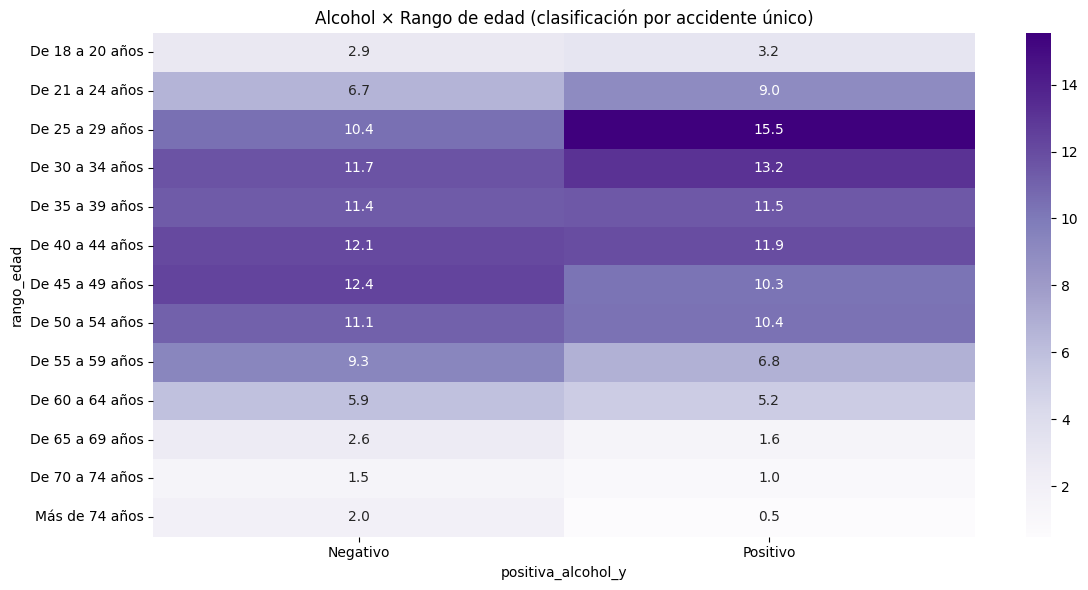

In [57]:
# 1. Filtrar solo conductores
df_conductores = df_2023[
    df_2023["tipo_persona"].str.lower() == "conductor"
].copy()

# 2. Eliminar menores de edad
rangos_menores = ["De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años"]
df_conductores = df_conductores[~df_conductores["rango_edad"].isin(rangos_menores)]

# 3. Eliminar alcohol = "No consta"
df_conductores = df_conductores[df_conductores["positiva_alcohol"] != "No consta"]

# 4. Eliminar rango_edad desconocido
df_conductores = df_conductores[df_conductores["rango_edad"] != "Desconocido"]

# 5. Clasificar accidentes según alcohol
# Si algún conductor del accidente dio positivo → accidente positivo
clasificacion_accidente = (
    df_conductores.groupby("num_expediente")["positiva_alcohol"]
    .apply(lambda x: "Positivo" if (x == "Positivo").any() else "Negativo")
    .reset_index()
)

# 6. Añadir la clasificación al dataframe de conductores
df_conductores = df_conductores.merge(clasificacion_accidente, on="num_expediente")

# 7. Tabla de contingencia: Rango de edad × Alcohol (por accidente único)
tabla_edad_alcohol = pd.crosstab(
    df_conductores["rango_edad"],
    df_conductores["positiva_alcohol_y"],  # columna creada por el merge
    values=df_conductores["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 8. Normalizar por columna (cada columna = 100%)
tabla_edad_alcohol_pct = tabla_edad_alcohol.div(
    tabla_edad_alcohol.sum(axis=0), axis=1
) * 100

# 9. Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(tabla_edad_alcohol_pct, annot=True, fmt=".1f", cmap="Purples")
plt.title("Alcohol × Rango de edad (clasificación por accidente único)")
plt.tight_layout()
plt.show()

En este caso, dentro de los accidentes con positivos en alcohol predominan los de entre 25 y 34 años, sobre todo los de entre 25 y 29 (jóvenes)

- ¿Existe una relación estadísticamente significativa entre el rango de edad y el alcohol en accidentes?

In [58]:
# 10. Chi-cuadrado sobre tabla absoluta
chi2, p, dof, expected = chi2_contingency(tabla_edad_alcohol)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 120.49512001977995
P-Value: 4.9235137024836447e-20
Grados de Libertad: 12
Frecuencias Esperadas:
 [[ 867.52539459   57.47460541]
 [2041.73273949  135.26726051]
 [3229.07019847  213.92980153]
 [3535.75214877  234.24785123]
 [3413.82966088  226.17033912]
 [3637.04160025  240.95839975]
 [3668.92902016  243.07097984]
 [3326.60818878  220.39181122]
 [2749.82103454  182.17896546]
 [1753.80809501  116.19190499]
 [ 762.48448195   50.51551805]
 [ 450.1753399    29.8246601 ]
 [ 570.2220972    37.7779028 ]]


p-valor muy pequeño --> hay relación

### Análisis bivariante entre el tipo de persona y el grado lesividad
- Distribución del grado de lesividad de las personas

Tabla absoluta:


grado_lesividad  Fallecido  Grave  Leve  Sin asistencia sanitaria
tipo_persona                                                     
Conductor               14    332  7443                     29753
Pasajero                 1     45  2136                      5299
Peatón                  11    185  1189                       382

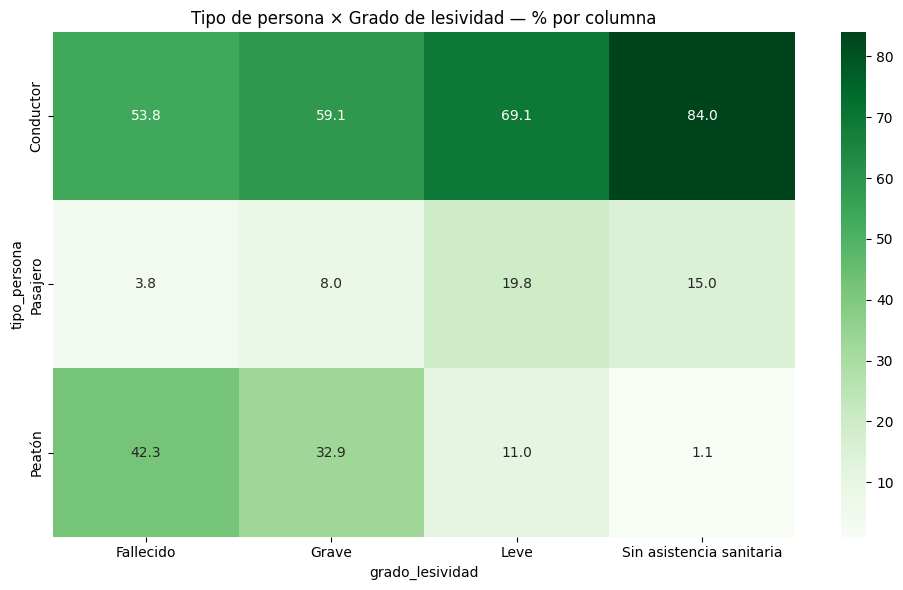

In [59]:
df = df_2023.copy()

# Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# Tabla absoluta (PERSONAS)
tabla_abs = pd.crosstab(
    df["tipo_persona"],
    df["grado_lesividad"]
)

print("Tabla absoluta:")
display(tabla_abs)

# Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Greens")
plt.title("Tipo de persona × Grado de lesividad — % por columna")
plt.tight_layout()
plt.show()

- Los conductores concentran la mayoría de lesiones en todas las categorías, especialmente en las leves y sin asistencia sanitaria.
- Los pasajeros tienen mayoría de lesiones leves.
- Aunque habíamos visto que las personas de grado de lesividad grave y fallecidos no llegan a representar más del 1%, como se puede ver en el heatmap, claramente los peatones son mucho más vulnerables y la gran mayoría han resultado gravemente heridos(ingreso superior a 24 horas) o han fallecido. Además de las personas que no han necesitado asistencia sanitaria solo representan el 1.1%.

- ¿Existe relación estadística entre el tipo de persona y el grado de lesividad?

In [60]:
# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 3963.5014862259773
p-value: 0.0
Grados de libertad: 6
Frecuencias esperadas:
 [[2.08611242e+01 4.50921222e+02 8.63971481e+03 2.84305028e+04]
 [4.15699936e+00 8.98551400e+01 1.72163727e+03 5.66535059e+03]
 [9.81876469e-01 2.12236375e+01 4.06647916e+02 1.33814657e+03]]


Sale un valor de frecuencia esperada < 1. Así que La categoría “Fallecido” la excluimos del análisis bivariante porque su frecuencia es extremadamente baja, lo que puede generar múltiples celdas con frecuencias esperadas inferiores a 5 en el test chi‑cuadrado.

Tabla absoluta:
grado_lesividad  Grave  Leve  Sin asistencia sanitaria
tipo_persona                                          
Conductor          332  7443                     29753
Pasajero            45  2136                      5299
Peatón             185  1189                       382

Tabla en porcentaje (% por columna):
grado_lesividad  Grave  Leve  Sin asistencia sanitaria
tipo_persona                                          
Conductor         59.1  69.1                      84.0
Pasajero           8.0  19.8                      15.0
Peatón            32.9  11.0                       1.1


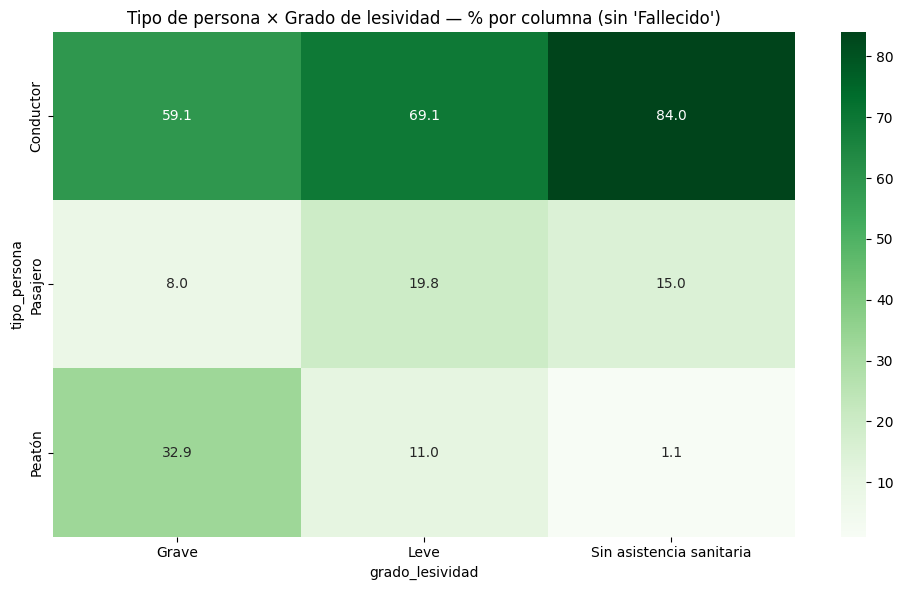


--- Chi-cuadrado ---
Chi2: 3876.1584354564548
p-value: 0.0
Grados de libertad: 4
Frecuencias esperadas:
 [[4.51003678e+02 8.64129467e+03 2.84357017e+04]
 [8.98930801e+01 1.72236421e+03 5.66774271e+03]
 [2.11032418e+01 4.04341117e+02 1.33055564e+03]]


In [61]:
# Copia del dataframe
df = df_2023.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Eliminar fallecidos
df = df[df["grado_lesividad"] != "Fallecido"]

# 3. Tabla absoluta (PERSONAS)
tabla_abs = pd.crosstab(
    df["tipo_persona"],
    df["grado_lesividad"]
)

print("Tabla absoluta:")
print(tabla_abs)

# 4. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100
print("\nTabla en porcentaje (% por columna):")
print(tabla_pct.round(1))

# 5. Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Greens")
plt.title("Tipo de persona × Grado de lesividad — % por columna (sin 'Fallecido')")
plt.tight_layout()
plt.show()

# 6. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


Sale un p-valor << 0.0001, así que hay relación estadísticamente significativa. 

### Análisis bivariante de rango de edad por lesividad
- ¿Cómo se distribuye el grado de lesividad según el rango de edad de las personas implicadas?

Tabla absoluta:


grado_lesividad  Fallecido  Grave  Leve  Sin asistencia sanitaria
rango_edad                                                       
De 18 a 20 años          1     20   421                      1034
De 21 a 24 años          2     47   830                      2143
De 25 a 29 años          4     50  1430                      3068
De 30 a 34 años          0     58  1394                      3334
De 35 a 39 años          1     53  1088                      3351
De 40 a 44 años          2     46  1076                      3642
De 45 a 49 años          1     57  1012                      3726
De 50 a 54 años          2     50   896                      3362
De 55 a 59 años          1     50   745                      2795
De 60 a 64 años          3     28   435                      1860
De 65 a 69 años          2     16   243                       879
De 70 a 74 años          1     10   174                       521
Más de 74 años           6     55   375                       691

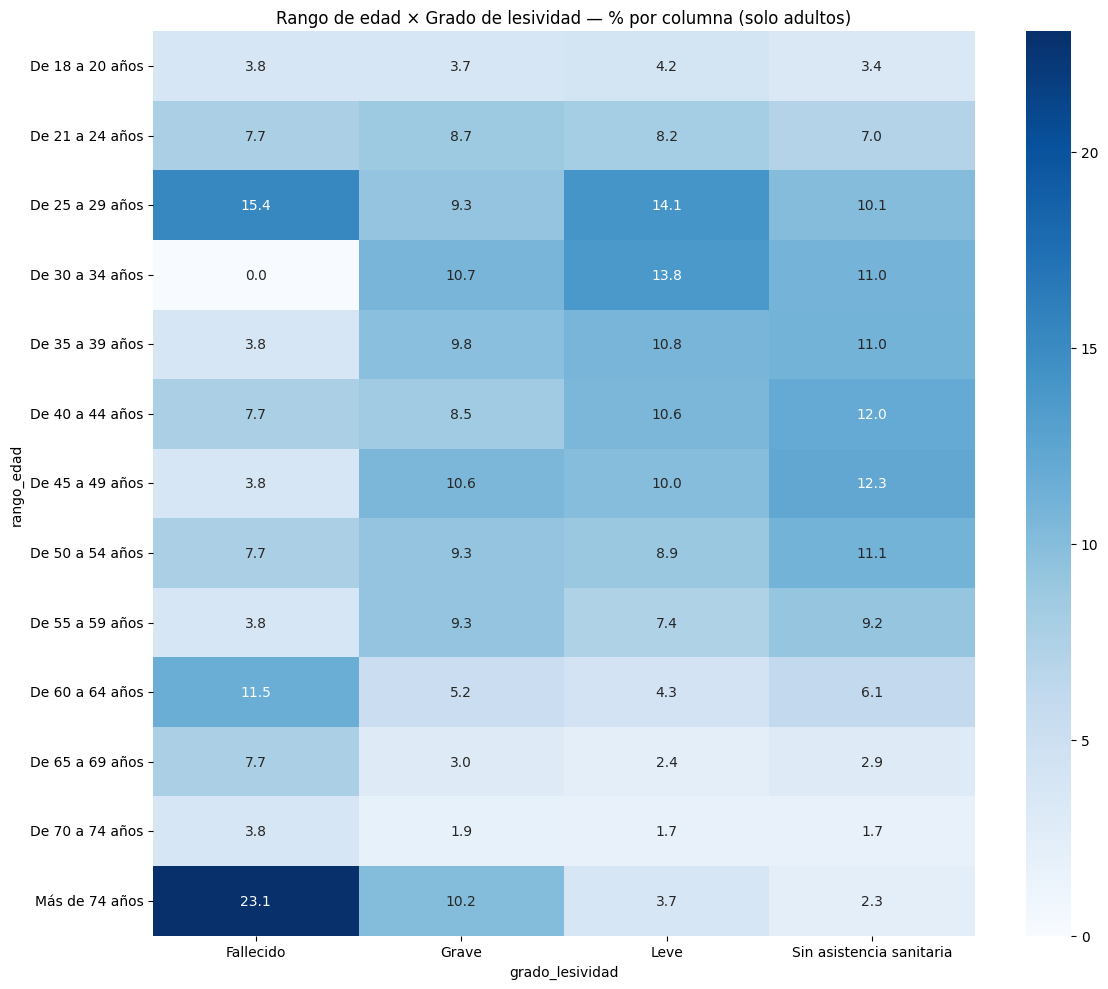

In [62]:
# Copia del dataframe
df = df_2023.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Eliminar edades desconocidas
df = df[df["rango_edad"] != "Desconocido"]

# 3. Eliminar menores de 18 años
rangos_menores = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años"
]
df = df[~df["rango_edad"].isin(rangos_menores)]

# 4. Orden correcto de los rangos de edad (solo adultos)
orden_edades_adultos = [
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df["rango_edad"] = pd.Categorical(df["rango_edad"], categories=orden_edades_adultos, ordered=True)

# 5. Tabla absoluta
tabla_abs = pd.crosstab(df["rango_edad"], df["grado_lesividad"])
print("Tabla absoluta:")
display(tabla_abs)

# 6. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 7. Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Rango de edad × Grado de lesividad — % por columna (solo adultos)")
plt.tight_layout()
plt.show()

- Los adultos de entre 25 y 59 años presentan la mayoría de las lesiones en todas las categorías, menos la de fallecidos. Especialmente, dentro de las lesiones leves y fallecidos, hay alta proporción de entre 25 y 29, y en el caso de leves también de entre 30 y 34 años.
- Los mayores de 65, presentan porcentajes bajos en todas las categorías, menos los de más de 74 años que presentan porcentajes más altos en grave y fallecido. 

¿Existe relación estadística?

In [63]:
# 8. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 579.1086751870156
p-value: 3.738265148382328e-99
Grados de libertad: 36
Frecuencias esperadas:
 [[9.33927137e-01 1.93969482e+01 3.63477258e+02 1.09219187e+03]
 [1.91214621e+00 3.97138059e+01 7.44192597e+02 2.23618145e+03]
 [2.88024142e+00 5.98203986e+01 1.12096780e+03 3.36833156e+03]
 [3.02830303e+00 6.28955246e+01 1.17859225e+03 3.54148393e+03]
 [2.84290964e+00 5.90450464e+01 1.10643856e+03 3.32467348e+03]
 [3.01564820e+00 6.26326933e+01 1.17366708e+03 3.52668458e+03]
 [3.03463045e+00 6.30269402e+01 1.18105483e+03 3.54888360e+03]
 [2.72711786e+00 5.66401402e+01 1.06137329e+03 3.18925945e+03]
 [2.27217639e+00 4.71913558e+01 8.84313572e+02 2.65722290e+03]
 [1.47175781e+00 3.05672775e+01 5.72796817e+02 1.72116415e+03]
 [7.21325838e-01 1.49813828e+01 2.80734467e+02 8.43562824e+02]
 [4.46715826e-01 9.27794408e+00 1.73858363e+02 5.22416977e+02]
 [7.13100192e-01 1.48105425e+01 2.77533109e+02 8.33943248e+02]]


In [64]:
# Compruebo si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

75.0


De nuevo, quitamos la categoría de "Fallecido". Además salen frecuencias esperadas menores que 1.

Tabla absoluta:
grado_lesividad  Grave  Leve  Sin asistencia sanitaria
rango_edad                                            
De 18 a 20 años     20   421                      1034
De 21 a 24 años     47   830                      2143
De 25 a 29 años     50  1430                      3068
De 30 a 34 años     58  1394                      3334
De 35 a 39 años     53  1088                      3351
De 40 a 44 años     46  1076                      3642
De 45 a 49 años     57  1012                      3726
De 50 a 54 años     50   896                      3362
De 55 a 59 años     50   745                      2795
De 60 a 64 años     28   435                      1860
De 65 a 69 años     16   243                       879
De 70 a 74 años     10   174                       521
Más de 74 años      55   375                       691


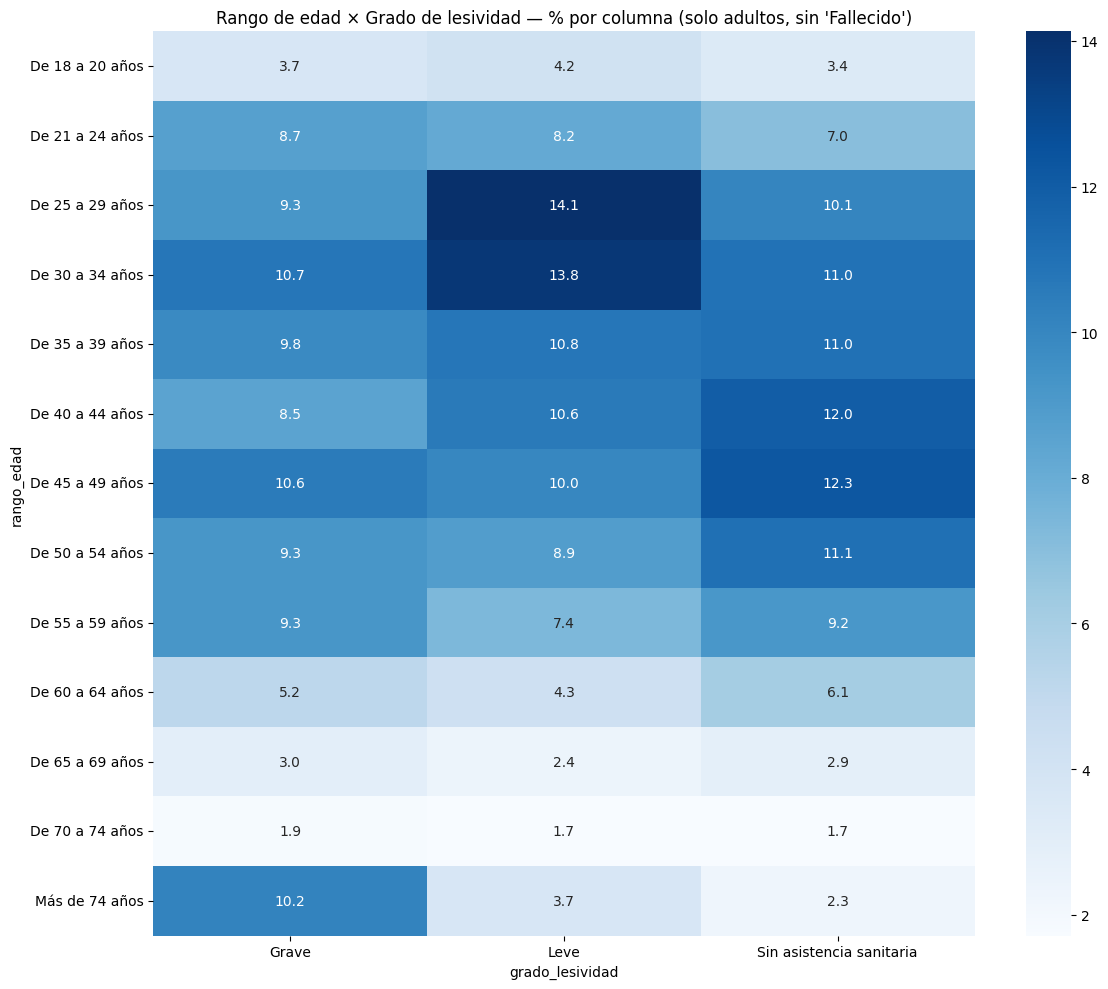

In [65]:
# Copia del dataframe
df = df_2023.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Eliminar fallecidos
df = df[df["grado_lesividad"] != "Fallecido"]

# 3. Eliminar edades desconocidas
df = df[df["rango_edad"] != "Desconocido"]

# 4. Eliminar menores de 18 años
rangos_menores = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años"
]
df = df[~df["rango_edad"].isin(rangos_menores)]

# 5. Orden correcto de los rangos de edad (solo adultos)
orden_edades_adultos = [
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df["rango_edad"] = pd.Categorical(df["rango_edad"], categories=orden_edades_adultos, ordered=True)

# 6. Tabla absoluta
tabla_abs = pd.crosstab(df["rango_edad"], df["grado_lesividad"])
print("Tabla absoluta:")
print(tabla_abs)

# 7. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 8. Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Rango de edad × Grado de lesividad — % por columna (solo adultos, sin 'Fallecido')")
plt.tight_layout()
plt.show()

In [66]:
# 9. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 528.8507633799927
p-value: 1.6752280498078532e-96
Grados de libertad: 24
Frecuencias esperadas:
 [[  19.39607939  363.4609765  1092.14294411]
 [  39.71265068  744.1709485  2236.11640083]
 [  59.80567393 1120.69187873 3367.50244734]
 [  62.9353464  1179.33846341 3543.72619019]
 [  59.06928041 1106.89268233 3326.03803726]
 [  62.64604895 1173.91735054 3527.43660051]
 [  63.05369536 1181.5561914  3550.39011324]
 [  56.64970169 1061.5524656  3189.7978327 ]
 [  47.20808474  884.62705467 2658.16486059]
 [  30.5471813   572.42023621 1720.03258249]
 [  14.96456837  280.4193839   842.61604773]
 [   9.27066845  173.72202606  522.00730549]
 [  14.74102033  276.23034214  830.02863753]]


Hay relación estadísticamente significativa.

### Análisis bivariante de tipo de accidente por grado de lesividad
- ¿Cómo se distribuye el tipo de accidente según el grado de lesividad?
- ¿Existe relación estadística entre ambas variables?

Tabla absoluta:


grado_lesividad               Fallecido  Grave  Leve  Sin asistencia sanitaria
tipo_accidente                                                                
Alcance                               0     66  2511                      8965
Atropello a persona                  12    182  1291                      1773
Caída                                 4     69  1687                       887
Choque contra obstáculo fijo          1     29   459                      4407
Colisión fronto-lateral               6    160  2832                      8955
Colisión lateral                      1     28   923                      6375
Colisión múltiple                     0      5   534                      2094

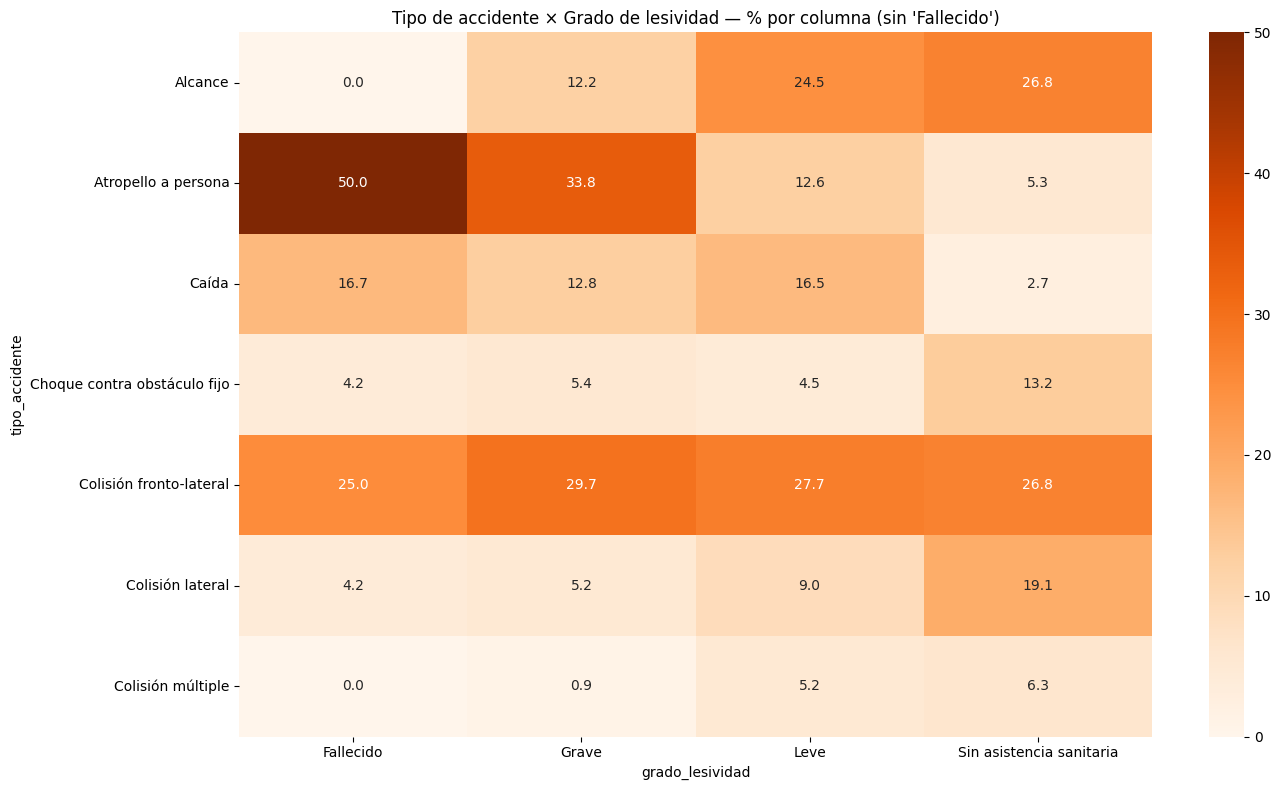


--- Chi-cuadrado ---
Chi2: 4877.7105494187335
p-value: 0.0
Grados de libertad: 18
Frecuencias esperadas:
 [[6.25921909e+00 1.40571629e+02 2.66981774e+03 8.72535141e+03]
 [1.76681128e+00 3.96796367e+01 7.53618628e+02 2.46293492e+03]
 [1.43546638e+00 3.22381824e+01 6.12286221e+02 2.00104013e+03]
 [2.65509761e+00 5.96290672e+01 1.13250976e+03 3.70120607e+03]
 [6.48210412e+00 1.45577255e+02 2.76488750e+03 9.03605315e+03]
 [3.97342733e+00 8.92365555e+01 1.69483232e+03 5.53895770e+03]
 [1.42787419e+00 3.20676744e+01 6.09047835e+02 1.99045662e+03]]


In [67]:
# Copia del dataframe
df = df_2023.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Mantener SOLO los 7 tipos de accidente seleccionados
tipos_validos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

df = df[df["tipo_accidente"].isin(tipos_validos)]

# 3. Ordenar categorías de lesividad (ya sin fallecido)
orden_lesividad = [
    "Fallecido",
    "Grave",
    "Leve",
    "Sin asistencia sanitaria"
]

df["grado_lesividad"] = pd.Categorical(df["grado_lesividad"],
                                       categories=orden_lesividad,
                                       ordered=True)

# 4. Tabla absoluta
tabla_abs = pd.crosstab(
    df["tipo_accidente"],
    df["grado_lesividad"]
)

print("Tabla absoluta:")
display(tabla_abs)

# 5. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 6. Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Oranges")
plt.title("Tipo de accidente × Grado de lesividad — % por columna (sin 'Fallecido')")
plt.tight_layout()
plt.show()

# 7. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

In [68]:
# Compruebo si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

82.14285714285714


- El 50% de las personas atropelladas han fallecido, y un 33.8% han sido gravemente heridas. 
- En alcance más del 50% presentan grado de lesividad leve o no han necesitado asistencia sanitaria.
- Colisión fronto-lateral destaca por un porcentaje elevado en todas las categorías. 
- Caída tiene un valor muy pequeño de gente sin asistencia médica.

El test chi-cuadrado revela que hay relación estadística.

### Análisis bivariante de tipo de accidente por estado meteorológico
- ¿Cómo se distribuye los tipos de accidentes según el estado meteorológico?
- ¿Existe relación estadística entre ambas variables?

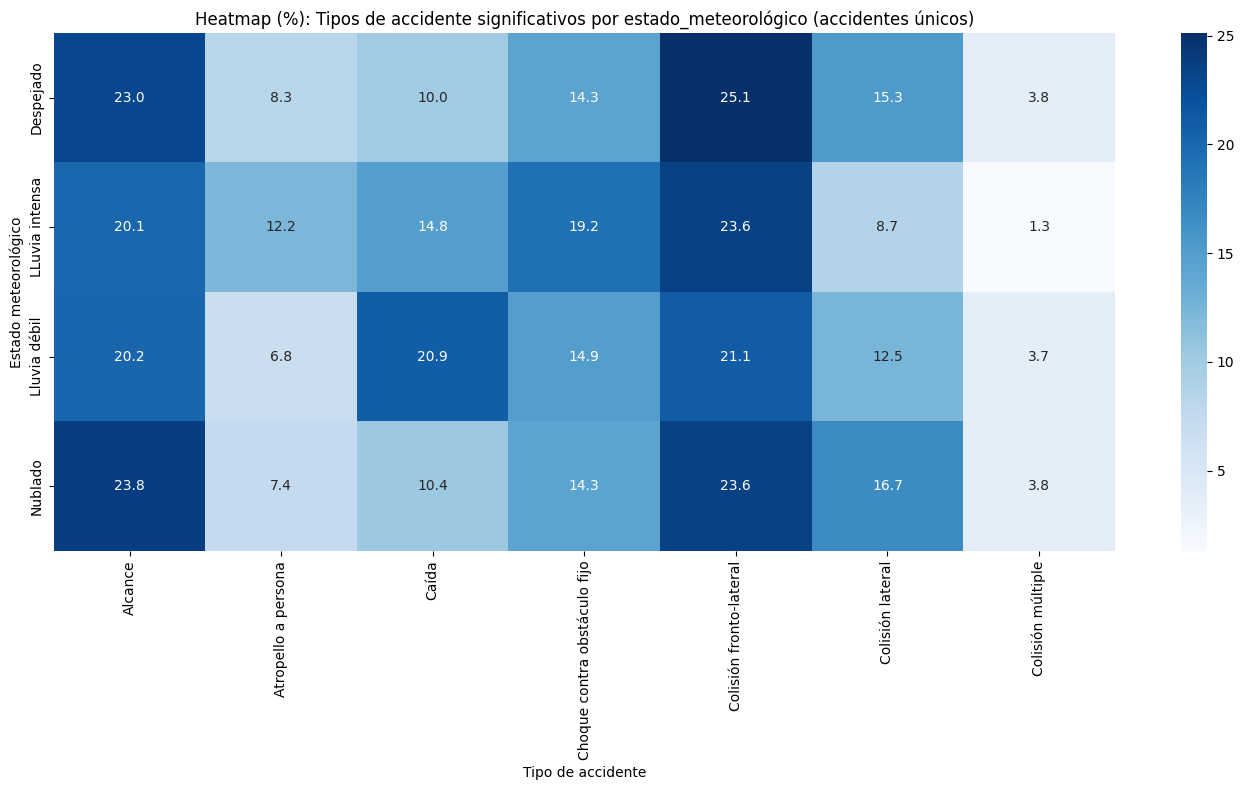

In [69]:
# 1. Definir los tipos de accidente significativos
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

estados = ["Despejado", "Nublado", "Lluvia débil", "LLuvia intensa"]

# 2. Filtrar el DataFrame original
df_filtrado = df_2023[
    df_2023["tipo_accidente"].isin(tipos_significativos) &
    df_2023["estado_meteorológico"].isin(estados)
]

# 3. Tabla de contingencia con expedientes únicos
tabla_contingencia = pd.crosstab(
    df_filtrado["estado_meteorológico"],
    df_filtrado["tipo_accidente"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 4. Convertir a porcentajes por fila 
tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

# 5. Heatmap en porcentajes
plt.figure(figsize=(14,8))
sns.heatmap(tabla_porcentajes, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap (%): Tipos de accidente significativos por estado_meteorológico (accidentes únicos)")
plt.xlabel("Tipo de accidente")
plt.ylabel("Estado meteorológico")
plt.tight_layout()
plt.show()

Como habíamos visto en el análisis univariante, en los cuatro estados meteorlógicos, los tipos de accidentes más presentes son por alcance y colisión fronto-lateral. 
- En los días nublados el porcentaje de alcance, caídas y colisiones laterales es mayor que en los días despejados.
- En las caídas, la mayor proporción se encuentra en días de lluvia débil, superando en más de un 10% a los días despejados. 
- Los días de lluvia intensa, superan en proporción a los días despejados en atropellos a personas, caídas y choques contra obstáculos. De hecho los tipos de accidentes están más o menos distribuidos en los días de lluvia intensa, menos colisiones laterales y múltiples, que tienen el menor porcentaje dentro de los estados.


In [70]:
# 6. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 131.4561353556149
p-value: 2.7958279687376643e-19
Grados de libertad: 18
Frecuencias esperadas:
 [[3325.89894214 1193.82447846 1549.74197742 2092.62336741 3596.91082087
  2206.68849359  546.3119201 ]
 [  52.48283198   18.83860292   24.45499675   33.02168903   56.75941138
    34.82164175    8.62082619]
 [ 196.63873294   70.58306247   91.62614503  123.72318421  212.66189941
   130.46711187   32.29986407]
 [ 302.97949294  108.75385616  141.1768808   190.63175935  327.66786833
   201.02275279   49.76738963]]


Podemos rechazar la hipótesis nula de la independencia de variables (p-valor muy pequeño), por tanto, hay relación estadísticamente significativa.

### Análisis bivariante de alcohol: Distribución de la positividad en alcohol según el grado de lesividad
- ¿Cómo se distribuyen los conductores con alcohol positivo y negativo según el grado de lesividad?
- ¿Existe una relación estadísticamente significativa?

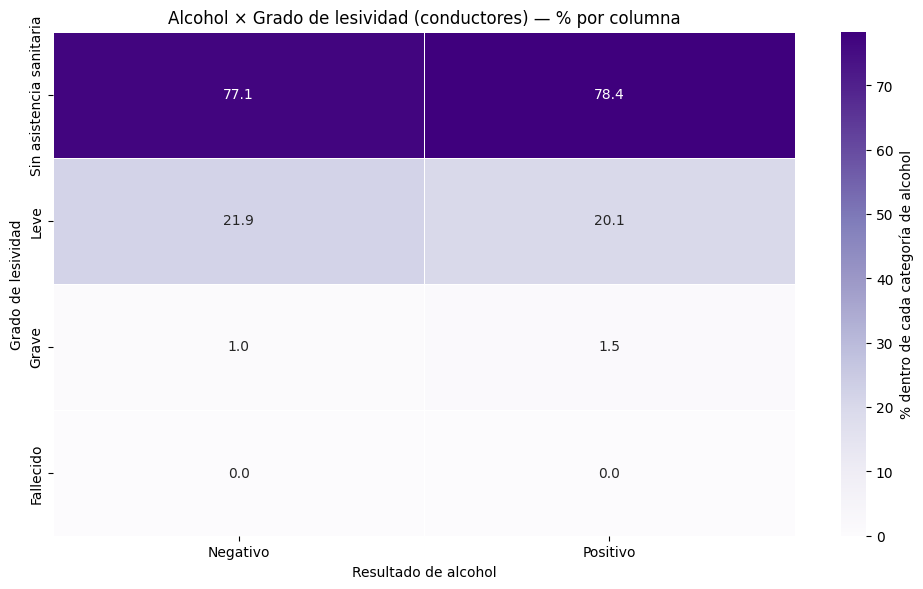

TEST CHI-CUADRADO
Valor Chi-Cuadrado: 6.982213420461285
P-Value: 0.07246685722226683
Grados de Libertad: 3

Frecuencias Esperadas:

positiva_alcohol              Negativo     Positivo
grado_lesividad                                    
Sin asistencia sanitaria  24586.259571  1075.740429
Leve                       6970.993089   305.006911
Grave                       312.334215    13.665785
Fallecido                    13.413126     0.586874


In [71]:
# 1. Filtrar solo CONDUCTORES
df = df_2023.copy()
df = df[df["tipo_persona"].str.lower() == "conductor"]

# 2. Limpiar datos
rangos_menores = ["De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años"]
df = df[~df["rango_edad"].isin(rangos_menores)]
df = df[df["positiva_alcohol"] != "No consta"]
df = df[df["rango_edad"] != "Desconocido"]

# 3. Tabla absoluta: grado de lesividad × alcohol
tabla_abs = pd.crosstab(
    df["grado_lesividad"],
    df["positiva_alcohol"]
)

# 4. Tabla porcentual para heatmap
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

orden_grado = [
    "Sin asistencia sanitaria",
    "Leve",
    "Grave",
    "Fallecido"
]

tabla_abs = tabla_abs.reindex(orden_grado)
tabla_pct = tabla_pct.reindex(orden_grado)

# 5. Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada categoría de alcohol"}
)

plt.title("Alcohol × Grado de lesividad (conductores) — % por columna")
plt.xlabel("Resultado de alcohol")
plt.ylabel("Grado de lesividad")
plt.tight_layout()
plt.show()

# 6. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("TEST CHI-CUADRADO")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)

# Convertir esperadas a DataFrame con índices y columnas correctas
expected_df = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

print("\nFrecuencias Esperadas:\n")
print(expected_df)

- La mayoría de los conductores, tanto positivos como negativos, no requirieron asistencia sanitaria.
- Las lesiones leves son el segundo grupo más frecuente, ligeramente más común en negativos.
- Las lesiones graves y los fallecimientos son muy poco frecuentes y prácticamente iguales en ambos grupos.

El p-valor no es menor que 0.05, por lo que con el test Chi-cuadrado no podemos afirmar que haya relación estadística y que las variables sean dependientes.

### Análisis bivariante de lesividad: Relación entre la hora del día y la gravedad de los accidentes
- ¿Cómo se distribuyen los ACCIDENTES según su gravedad en cada franja horaria?
- ¿Existe una relación estadísticamente significativa entre la franja horaria y la gravedad del ACCIDENTE?”

Tabla absoluta:


grado_lesividad  Fallecido  Grave    Leve  Sin asistencia sanitaria
franja                                                             
Madrugada              3.0   51.0   659.0                    1694.0
Mañana                 8.0  154.0  2134.0                    4438.0
Tarde                  7.0  166.0  3240.0                    6716.0
Noche                  6.0  160.0  2649.0                    5855.0

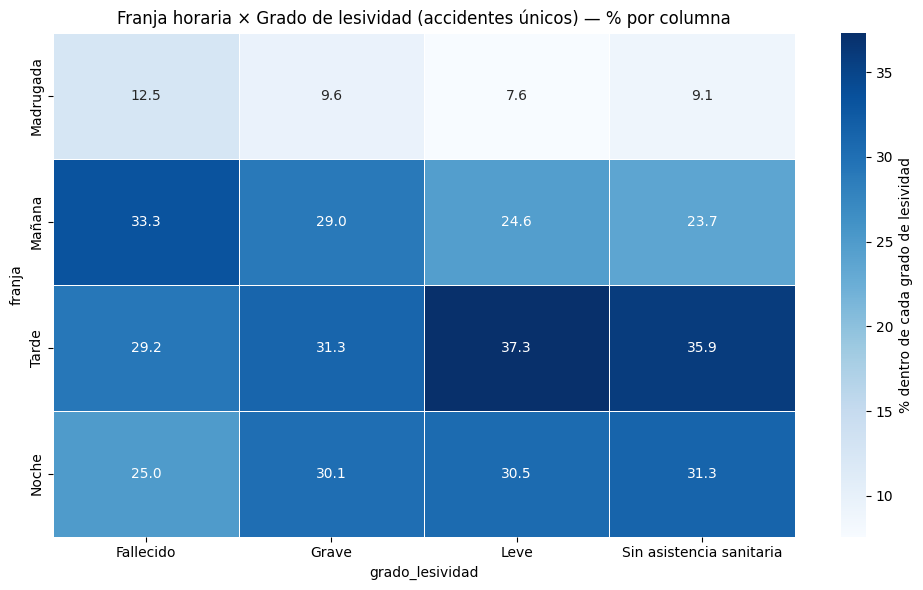


--- Resultados Chi-cuadrado ---
Valor Chi-Cuadrado: 32.832842062828234
P-Value: 0.00014280242320309624
Grados de Libertad: 9

Frecuencias Esperadas:
 [[2.06757337e+00 4.57450608e+01 7.47944667e+02 1.61124270e+03]
 [5.78439513e+00 1.27979742e+02 2.09250494e+03 4.50773092e+03]
 [8.70064424e+00 1.92501754e+02 3.14745805e+03 6.78033955e+03]
 [7.44738726e+00 1.64773443e+02 2.69409234e+03 5.80368683e+03]]


In [72]:
# 1. Copia del dataset
df = df_2023.copy()

# 2. Crear columna hora desde fecha_hora (datetime) 
df["hora"] = df["fecha_hora"].dt.hour

# 3. Crear franja horaria 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# 4. Eliminar categoría "Se desconoce" en grado_lesividad 
df = df[df["grado_lesividad"] != "Se desconoce"]

# 5. Tabla absoluta: Franja × Grado de lesividad (accidentes únicos)
tabla_abs = pd.crosstab(
    df["franja"],
    df["grado_lesividad"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla absoluta:")
display(tabla_abs)

# 6. Convertir a porcentajes por columna (cada columna suma 100%)
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 7. Heatmap en porcentaje
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada grado de lesividad"}
)

plt.title("Franja horaria × Grado de lesividad (accidentes únicos) — % por columna")
plt.tight_layout()
plt.show()

# 8. Test Chi-cuadrado (siempre con tabla absoluta)
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("\nFrecuencias Esperadas:\n", expected)

In [73]:
# Compruebo si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

93.75


- Los accidentes de madrugada son los que menos proporción tienen en todas las categorías de lesividad, el resto de franjas horarias tienen porcentajes elevados.
- En fallecidos, destacan principalmente los accidentes de mañana, y en leve y asistencia sanitaria, los de tarde.

p-valor << 0.001 --> Existe relación.

### Análisis bivariante lesividad: Positividad en alcohol por franja horaria
- ¿Cómo se distribuyen los ACCIDENTES con alcohol positivo y negativo según la franja horaria?
- ¿Existe una asociación estadísticamente significativa entre la franja horaria y el resultado de alcohol del accidente

Tabla absoluta:


alcohol_accidente  Negativo  Positivo
franja                               
Madrugada              1457       504
Mañana                 4647       255
Tarde                  7187       159
Noche                  5962       471

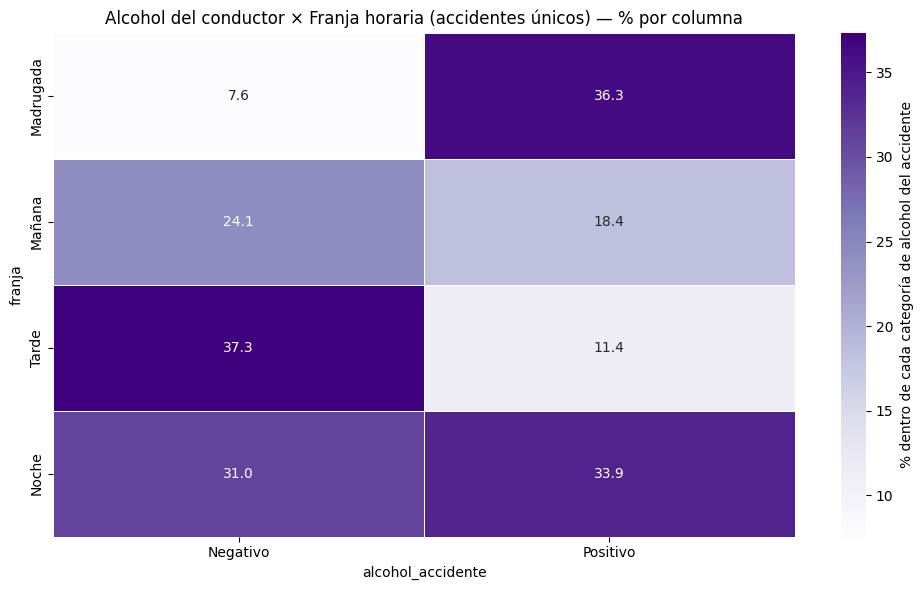


--- Resultados Chi-cuadrado ---
Valor Chi-Cuadrado: 1390.3213497364763
P-Value: 3.709920126876905e-301
Grados de Libertad: 3

Frecuencias Esperadas:
 [[1829.0443271   131.9556729 ]
 [4572.14446275  329.85553725]
 [6851.68772406  494.31227594]
 [6000.1234861   432.8765139 ]]


In [74]:
# 1. Copia del dataset 
df = df_2023.copy()

# 2. Filtrar alcohol registrado (opcional pero recomendable)
df = df[df["positiva_alcohol"] != "No consta"]

# 3. Crear columna hora desde fecha_hora 
df["hora"] = df["fecha_hora"].dt.hour

# 4. Crear franja horaria 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# 5. Filtrar solo conductores para clasificar el accidente
df_cond = df[df["tipo_persona"].str.lower() == "conductor"]

# 6. Clasificar accidente según alcohol del conductor
alcohol_accidente = df_cond.groupby("num_expediente")["positiva_alcohol"].apply(
    lambda x: "Positivo" if "Positivo" in x.values else "Negativo"
).reset_index().rename(columns={"positiva_alcohol": "alcohol_accidente"})

# 7. Unir clasificación al dataframe original
df = df.merge(alcohol_accidente, on="num_expediente", how="left")

# 8. Tabla absoluta: Alcohol del accidente × Franja (accidentes únicos)
tabla_abs = pd.crosstab(
    df["franja"],
    df["alcohol_accidente"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla absoluta:")
display(tabla_abs)

# 9. Convertir a porcentajes por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 10. Heatmap en porcentaje
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada categoría de alcohol del accidente"}
)

plt.title("Alcohol del conductor × Franja horaria (accidentes únicos) — % por columna")
plt.tight_layout()
plt.show()

# 11. Test Chi-cuadrado (sobre tabla absoluta)
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("\nFrecuencias Esperadas:\n", expected)

- Mayor concentración de positivos de noche y madrugada, alrededor de un 70% entre las dos.
- Distribución concentrada de negativos en Tarde.

El test Chi-cuadrado confirma que la franja horaria influye en la presencia del alcohol en conductores.

# Análisis Multivariante

Análisis multivariante Geográfico: Análisis de la coordenada x e y del accidente con distribución por distrito

C:\Users\lufue\AppData\Local\Temp\ipykernel_37620\3169201483.py:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  .apply(lambda x: x.unary_union.centroid)


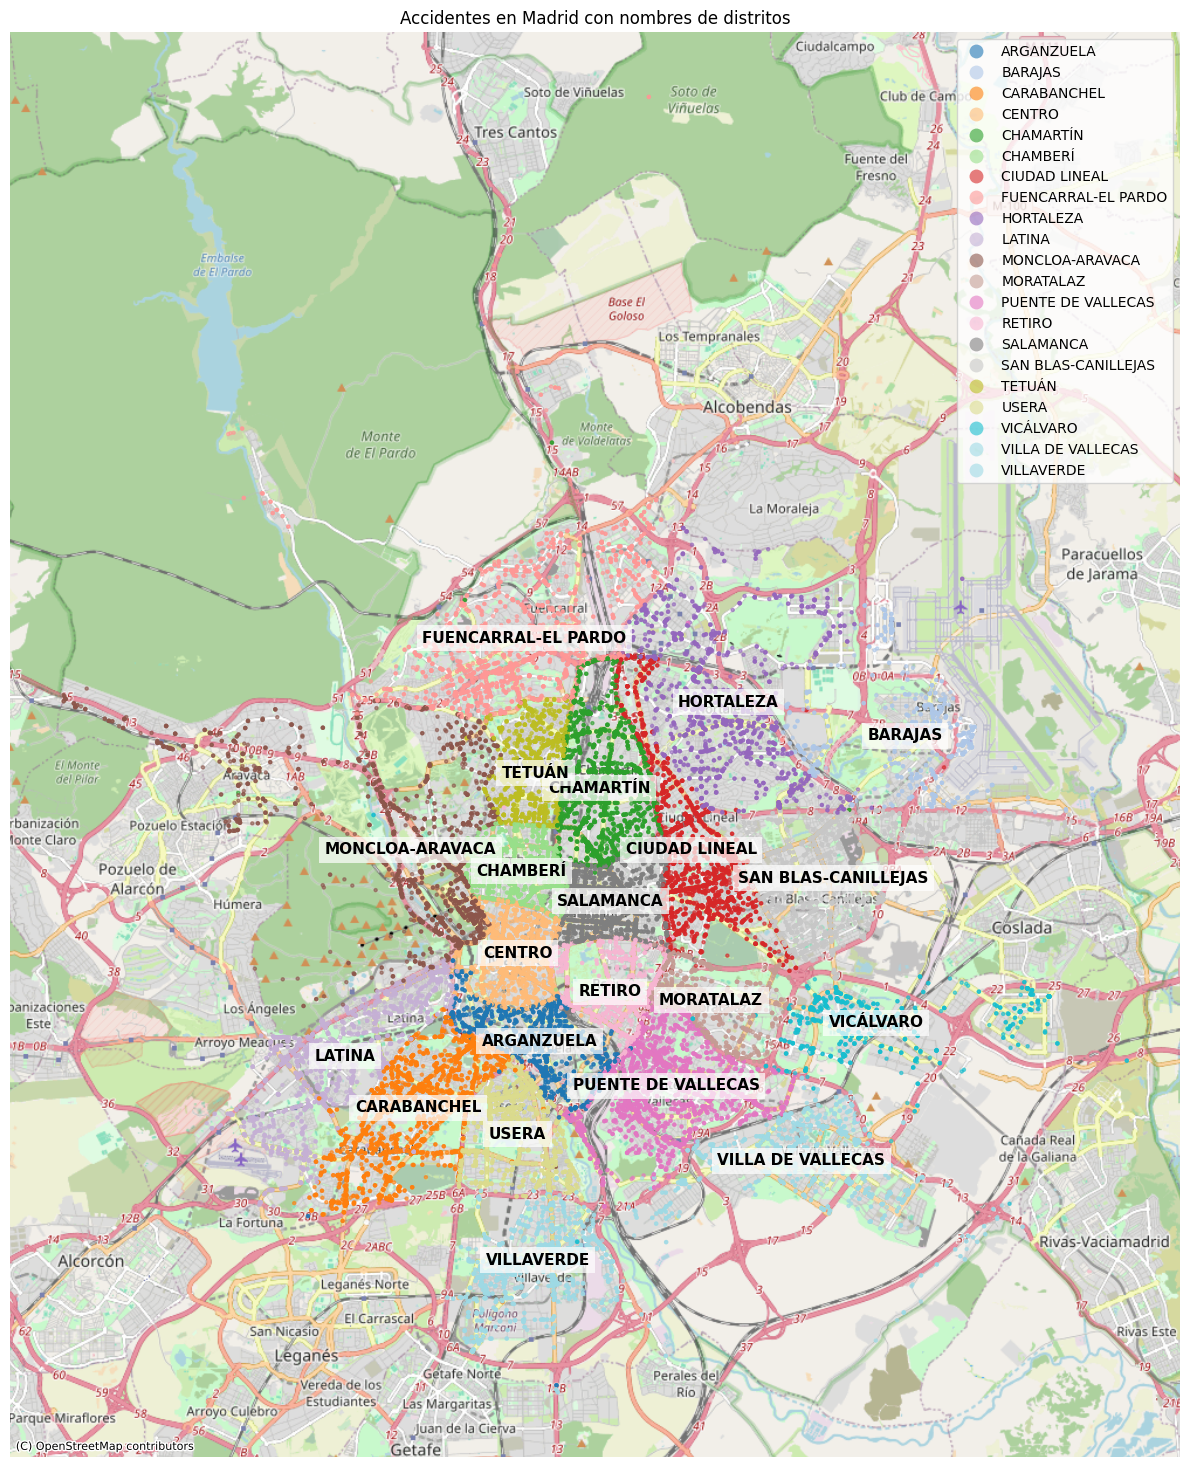

In [75]:
import geopandas as gpd
import contextily as ctx

# 1. Convertir tu dataframe a GeoDataFrame
df = df_2023.copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["coordenada_x_utm"], df["coordenada_y_utm"]),
    crs="EPSG:25830"
)

# 2. Reproyectar a Web Mercator
gdf_web = gdf.to_crs(epsg=3857)

# 3. Calcular el centro aproximado de cada distrito
centros = (
    gdf_web.groupby("distrito", observed = False)["geometry"]
    .apply(lambda x: x.unary_union.centroid)
    .reset_index()
)

# 4. Crear el mapa con colores por distrito
fig, ax = plt.subplots(figsize=(12, 16))

gdf_web.plot(
    ax=ax,
    column="distrito",
    markersize=5,
    alpha=0.6,
    legend=True,
    categorical=True,
    cmap="tab20"
)

# 5. Añadir mapa base
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    zoom=12
)

# 6. Añadir los nombres de los distritos
for _, row in centros.iterrows():
    ax.text(
        row.geometry.x,
        row.geometry.y,
        row["distrito"],
        fontsize=11,
        fontweight="bold",
        color="black",
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# 7. Ajustes finales
ax.set_title("Accidentes en Madrid con nombres de distritos")
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [76]:
# 1. Superficie oficial de los 21 distritos de Madrid (km²)
superficie_distritos = {
    "CENTRO": 5.23,
    "ARGANZUELA": 6.46,
    "RETIRO": 5.47,
    "SALAMANCA": 5.38,
    "CHAMARTÍN": 5.99,
    "TETUÁN": 5.38,
    "CHAMBERÍ": 4.69,
    "FUENCARRAL-EL PARDO": 237.81,
    "MONCLOA-ARAVACA": 46.65,
    "LATINA": 25.41,
    "CARABANCHEL": 14.76,
    "USERA": 7.75,
    "PUENTE DE VALLECAS": 14.89,
    "MORATALAZ": 6.34,
    "CIUDAD LINEAL": 11.43,
    "HORTALEZA": 27.41,
    "VILLAVERDE": 20.29,
    "VILLA DE VALLECAS": 48.34,
    "VICÁLVARO": 14.40,
    "SAN BLAS-CANILLEJAS": 22.36,
    "BARAJAS": 41.94
}

df_superficie = pd.DataFrame(
    list(superficie_distritos.items()),
    columns=["distrito", "area_km2"]
)

# 2. Copia del dataframe original
df_acc = df_2023.copy()

# 3. Contar EXPEDIENTES ÚNICOS por distrito
acc_por_distrito = (
    df_acc.groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .reset_index(name="n_accidentes_unicos")
)

# 4. Unir accidentes únicos + superficie
df_densidad = acc_por_distrito.merge(df_superficie, on="distrito", how="left")

# 5. Calcular densidad REAL
df_densidad["densidad_accidentes_km2"] = (
    df_densidad["n_accidentes_unicos"] / df_densidad["area_km2"]
)

# 6. Ordenar de mayor a menor densidad
df_densidad = df_densidad.sort_values(
    "densidad_accidentes_km2", ascending=False
)

df_densidad

distrito  n_accidentes_unicos  area_km2  \
14            SALAMANCA                 1412      5.38   
3                CENTRO                 1355      5.23   
4             CHAMARTÍN                 1397      5.99   
5              CHAMBERÍ                  919      4.69   
13               RETIRO                  997      5.47   
16               TETUÁN                  880      5.38   
0            ARGANZUELA                  935      6.46   
17                USERA                  849      7.75   
6         CIUDAD LINEAL                 1244     11.43   
12   PUENTE DE VALLECAS                 1549     14.89   
2           CARABANCHEL                 1355     14.76   
11            MORATALAZ                  551      6.34   
15  SAN BLAS-CANILLEJAS                  987     22.36   
9                LATINA                  972     25.41   
20           VILLAVERDE                  771     20.29   
8             HORTALEZA                  809     27.41   
18            VICÁLVARO                  399     14.40   
10      MONCLOA-ARAVACA                 1045     46.65   
19    VILLA DE VALLECAS                  630     48.34   
1               BARAJAS                  413     41.94   
7   FUENCARRAL-EL PARDO                 1199    237.81   

    densidad_accidentes_km2  
14               262.453532  
3                259.082218  
4                233.222037  
5                195.948827  
13               182.266910  
16               163.568773  
0                144.736842  
17               109.548387  
6                108.836395  
12               104.029550  
2                 91.802168  
11                86.908517  
15                44.141324  
9                 38.252656  
20                37.999014  
8                 29.514776  
18                27.708333  
10                22.400857  
19                13.032685  
1                  9.847401  
7                  5.041840

El Scatterplot muestra zonas con alta densidad visual (muchos puntos superpuestos) y el cálculo de densidad por km2 confirma si esa concetración es relativa al tamaño del distrito y efectivamente vemos que el top 5 en función a su tamaño se concentran de la siguiente forma:

- Distrito de Salamanca
- Distrito de Centro
- Distrito de Chamartín
- Distrito de Chamberí
- Distrito de Retiro